# Street Analysis

In [1]:
# Importing necessary packages for Street Analysis
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

In [2]:
#Reading in files from police_data directory to list and concatenating resulting list to a single dataframe: street
street_csv_files = glob.glob('data/police_data' + '/**/' + '*street.csv', recursive=True)

df_street = []

for file in street_csv_files:
    df = pd.read_csv(file)
    df_street.append(df)
    
db = pd.concat(df_street, ignore_index=True)
street = db.copy()

# Cleaning Street

In [3]:
def clean_date_column(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce') 
    df['year'] = df[date_column].dt.year
    df['month'] = df[date_column].dt.month
    df['day'] = df[date_column].dt.day
    df['hour'] = df[date_column].dt.hour
    return df

In [4]:
street = clean_date_column(street, 'Month')

street = street.drop('Context', axis = 'columns')

## Creating Dictionaries for Area coordinates

In [5]:
metropolitan_df = street[street['Reported by'] == 'Metropolitan Police Service']
north_yorkshire_df = street[street['Reported by'] == 'North Yorkshire Police']
west_midlands_df = street[street['Reported by'] == 'West Midlands Police']

In [6]:
met_lat_max = metropolitan_df['Latitude'].max()
met_lat_min = metropolitan_df['Latitude'].min()
met_lon_max = metropolitan_df['Longitude'].max()
met_lon_min = metropolitan_df['Longitude'].min()

met_location_range = {'area':'metropolitan','lat_max':met_lat_max, 'lat_min':met_lat_min, 'lon_max':met_lon_max, 'lon_min':met_lon_min}
met_location_range

{'area': 'metropolitan',
 'lat_max': 55.788274,
 'lat_min': 50.04211,
 'lon_max': 1.745512,
 'lon_min': -5.65517}

In [7]:
ny_lat_max = north_yorkshire_df['Latitude'].max()
ny_lat_min = north_yorkshire_df['Latitude'].min()
ny_lon_max = north_yorkshire_df['Longitude'].max()
ny_lon_min = north_yorkshire_df['Longitude'].min()

ny_location_range = {'area':'north yorkshire', 'lat_max':ny_lat_max, 'lat_min':ny_lat_min, 'lon_max':ny_lon_max, 'lon_min':ny_lon_min}
ny_location_range

{'area': 'north yorkshire',
 'lat_max': 55.181067,
 'lat_min': 51.378202,
 'lon_max': 0.95642,
 'lon_min': -7.428625}

In [8]:
wm_lat_max = west_midlands_df['Latitude'].max()
wm_lat_min = west_midlands_df['Latitude'].min()
wm_lon_max = west_midlands_df['Longitude'].max()
wm_lon_min = west_midlands_df['Longitude'].min()

wm_location_range = {'area':'west midlands', 'lat_max':wm_lat_max, 'lat_min':wm_lat_min, 'lon_max':wm_lon_max, 'lon_min':wm_lon_min}
wm_location_range

{'area': 'west midlands',
 'lat_max': 52.661109,
 'lat_min': 52.348321,
 'lon_max': -1.427829,
 'lon_min': -2.205265}

# Raw and Processed Dataframes

In [9]:
db

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,bcf33862673ea5cebb2d0814770e3147981dd6c6f88ad6...,2021-04,Metropolitan Police Service,Metropolitan Police Service,0.867037,51.141024,On or near Christchurch Road,E01024029,Ashford 005E,Violence and sexual offences,Investigation complete; no suspect identified,NaN
1,578df7143c18214677518d49cf3834f34016eefaa134d1...,2021-04,Metropolitan Police Service,Metropolitan Police Service,-0.590478,51.862951,On or near Church Croft,E01017658,Aylesbury Vale 009D,Violence and sexual offences,Status update unavailable,NaN
2,NaN,2021-04,Metropolitan Police Service,Metropolitan Police Service,0.135866,51.587336,On or near Gibbfield Close,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
3,NaN,2021-04,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
4,NaN,2021-04,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4466405,91ea30c23e6f7c118726d69d2b77a4785e02e5684cfa13...,2024-03,West Midlands Police,West Midlands Police,-2.118325,52.573820,On or near Pond Grove,E01034315,Wolverhampton 035J,Violence and sexual offences,Under investigation,NaN
4466406,be9357c5c0fa4f3835755e06f8f5c96431c5b95e279358...,2024-03,West Midlands Police,West Midlands Police,-2.121527,52.573817,On or near Waterside Close,E01034315,Wolverhampton 035J,Violence and sexual offences,Under investigation,NaN
4466407,6c6d1dddfc50e4f0d1881231ff80313ee8409799dc58b0...,2024-03,West Midlands Police,West Midlands Police,-2.117890,52.570935,On or near Rowan Tree Drive,E01034315,Wolverhampton 035J,Violence and sexual offences,Unable to prosecute suspect,NaN
4466408,762f27714160317cbea1106c1477d32f40e1fbb4e2caa4...,2024-03,West Midlands Police,West Midlands Police,-2.117079,52.571358,On or near Willcock Road,E01034315,Wolverhampton 035J,Violence and sexual offences,Under investigation,NaN


In [10]:
street

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,year,month,day,hour
0,bcf33862673ea5cebb2d0814770e3147981dd6c6f88ad6...,2021-04-01,Metropolitan Police Service,Metropolitan Police Service,0.867037,51.141024,On or near Christchurch Road,E01024029,Ashford 005E,Violence and sexual offences,Investigation complete; no suspect identified,2021.0,4.0,1.0,0.0
1,578df7143c18214677518d49cf3834f34016eefaa134d1...,2021-04-01,Metropolitan Police Service,Metropolitan Police Service,-0.590478,51.862951,On or near Church Croft,E01017658,Aylesbury Vale 009D,Violence and sexual offences,Status update unavailable,2021.0,4.0,1.0,0.0
2,NaN,2021-04-01,Metropolitan Police Service,Metropolitan Police Service,0.135866,51.587336,On or near Gibbfield Close,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,2021.0,4.0,1.0,0.0
3,NaN,2021-04-01,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,2021.0,4.0,1.0,0.0
4,NaN,2021-04-01,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,2021.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4466405,91ea30c23e6f7c118726d69d2b77a4785e02e5684cfa13...,2024-03-01,West Midlands Police,West Midlands Police,-2.118325,52.573820,On or near Pond Grove,E01034315,Wolverhampton 035J,Violence and sexual offences,Under investigation,2024.0,3.0,1.0,0.0
4466406,be9357c5c0fa4f3835755e06f8f5c96431c5b95e279358...,2024-03-01,West Midlands Police,West Midlands Police,-2.121527,52.573817,On or near Waterside Close,E01034315,Wolverhampton 035J,Violence and sexual offences,Under investigation,2024.0,3.0,1.0,0.0
4466407,6c6d1dddfc50e4f0d1881231ff80313ee8409799dc58b0...,2024-03-01,West Midlands Police,West Midlands Police,-2.117890,52.570935,On or near Rowan Tree Drive,E01034315,Wolverhampton 035J,Violence and sexual offences,Unable to prosecute suspect,2024.0,3.0,1.0,0.0
4466408,762f27714160317cbea1106c1477d32f40e1fbb4e2caa4...,2024-03-01,West Midlands Police,West Midlands Police,-2.117079,52.571358,On or near Willcock Road,E01034315,Wolverhampton 035J,Violence and sexual offences,Under investigation,2024.0,3.0,1.0,0.0


# Dataframe Classes

Organizing and simplifying code by creating chronologically seperated dfs as objects by month, year and area

In [11]:
class Area:

    def __init__(self, df, area):
        self.df = df
        self.area = area

In [12]:
class Year:

    def __init__(self, df, area):
        self.df = df
        self.area = area

In [13]:
class Month:
    
    def __init__(self, df, area, month, year):
        self.df = df
        self.area = area
        self.month = month
        self.year = year

## Instantiating Area Class

In [14]:
met = Area(street[street['Reported by'] == 'Metropolitan Police Service'], 'Metropolitan')
ny = Area(street[street['Reported by'] == 'North Yorkshire Police'], 'North Yorkshire')
wm = Area(street[street['Reported by'] == 'West Midlands Police'], 'West Midlands')

## Instantiating Year Class

In [15]:
# Year dataframes for different areas

        #Metropolitan
met_2021 = Year(metropolitan_df[metropolitan_df['year'] == 2021.0], 'Metropolitan')
met_2022 = Year(metropolitan_df[metropolitan_df['year'] == 2022.0], 'Metropolitan')
met_2023 = Year(metropolitan_df[metropolitan_df['year'] == 2023.0], 'Metropolitan')
met_2024 = Year(metropolitan_df[metropolitan_df['year'] == 2024.0], 'Metropolitan')

met.years = met_year_dfs = [met_2021, met_2022, met_2023, met_2024]

In [16]:
        #North Yorkshire
ny_2021 = Year(north_yorkshire_df[north_yorkshire_df['year'] == 2021.0], 'North Yorkshire')
ny_2022 = Year(north_yorkshire_df[north_yorkshire_df['year'] == 2022.0], 'North Yorkshire')
ny_2023 = Year(north_yorkshire_df[north_yorkshire_df['year'] == 2023.0], 'North Yorkshire')
ny_2024 = Year(north_yorkshire_df[north_yorkshire_df['year'] == 2024.0], 'North Yorkshire')

ny.years = ny_year_dfs = [ny_2021, ny_2022, ny_2023, ny_2024]

In [17]:
        #West Midlands
wm_2021 = Year(west_midlands_df[west_midlands_df['year'] == 2021.0], 'West Midlands')
wm_2022 = Year(west_midlands_df[west_midlands_df['year'] == 2022.0], 'West Midlands')
wm_2023 = Year(west_midlands_df[west_midlands_df['year'] == 2023.0], 'West Midlands')
wm_2024 = Year(west_midlands_df[west_midlands_df['year'] == 2024.0], 'West Midlands')

wm.years = wm_year_dfs = [wm_2021, wm_2022, wm_2023, wm_2024]

## Instantiating Month Class

In [18]:
month_dict = {1.0: 'Jan',
              2.0: 'Feb',
              3.0: 'Mar',
              4.0: 'Apr',
              5.0: 'May',
              6.0: 'Jun',
              7.0: 'Jul',
              8.0: 'Aug',
              9.0: 'Sep',
              10.0: 'Oct',
              11.0: 'Nov',
              12.0: 'Dec'}

**Instatiating dataframes for different areas by Month**

In [19]:
#Month dataframes for Metropolitan

        #2021
met_2021_04 = Month(met_2021.df[met_2021.df['month'] == 4.0], met_2021.area, month_dict[4.0], 2021)
met_2021_05 = Month(met_2021.df[met_2021.df['month'] == 5.0], met_2021.area, month_dict[5.0], 2021)
met_2021_06 = Month(met_2021.df[met_2021.df['month'] == 6.0], met_2021.area, month_dict[6.0], 2021)
met_2021_07 = Month(met_2021.df[met_2021.df['month'] == 7.0], met_2021.area, month_dict[7.0], 2021)
met_2021_08 = Month(met_2021.df[met_2021.df['month'] == 8.0], met_2021.area, month_dict[8.0], 2021)
met_2021_09 = Month(met_2021.df[met_2021.df['month'] == 9.0], met_2021.area, month_dict[9.0], 2021)
met_2021_10 = Month(met_2021.df[met_2021.df['month'] == 10.0], met_2021.area, month_dict[10.0], 2021)
met_2021_11 = Month(met_2021.df[met_2021.df['month'] == 11.0], met_2021.area, month_dict[11.0], 2021)
met_2021_12 = Month(met_2021.df[met_2021.df['month'] == 12.0], met_2021.area, month_dict[12.0], 2021)

met_2021.dflist = met_2021_dfs = [met_2021_04, met_2021_05, met_2021_06, met_2021_07, met_2021_08, met_2021_09, met_2021_10, met_2021_11, met_2021_12]

In [20]:
        #2022
met_2022_01 = Month(met_2022.df[met_2022.df['month'] == 1.0], met_2022.area, month_dict[1.0], 2022)
met_2022_02 = Month(met_2022.df[met_2022.df['month'] == 2.0], met_2022.area, month_dict[2.0], 2022)
met_2022_03 = Month(met_2022.df[met_2022.df['month'] == 3.0], met_2022.area, month_dict[3.0], 2022)
met_2022_04 = Month(met_2022.df[met_2022.df['month'] == 4.0], met_2022.area, month_dict[4.0], 2022)
met_2022_05 = Month(met_2022.df[met_2022.df['month'] == 5.0], met_2022.area, month_dict[5.0], 2022)
met_2022_06 = Month(met_2022.df[met_2022.df['month'] == 6.0], met_2022.area, month_dict[6.0], 2022)
met_2022_07 = Month(met_2022.df[met_2022.df['month'] == 7.0], met_2022.area, month_dict[7.0], 2022)
met_2022_08 = Month(met_2022.df[met_2022.df['month'] == 8.0], met_2022.area, month_dict[8.0], 2022)
met_2022_09 = Month(met_2022.df[met_2022.df['month'] == 9.0], met_2022.area, month_dict[9.0], 2022)
met_2022_10 = Month(met_2022.df[met_2022.df['month'] == 10.0], met_2022.area, month_dict[10.0], 2022)
met_2022_11 = Month(met_2022.df[met_2022.df['month'] == 11.0], met_2022.area, month_dict[11.0], 2022)
met_2022_12 = Month(met_2022.df[met_2022.df['month'] == 12.0], met_2022.area, month_dict[12.0], 2022)

met_2022.dflist = met_2022_dfs = [met_2022_01, met_2022_02, met_2022_03, met_2022_04, met_2022_05, met_2022_06, met_2022_07, met_2022_08, met_2022_09, met_2022_10, \
                                  met_2022_11, met_2022_12]

In [21]:
    #2023
met_2023_01 = Month(met_2023.df[met_2023.df['month'] == 1.0], met_2023.area, month_dict[1.0], 2023)
met_2023_02 = Month(met_2023.df[met_2023.df['month'] == 2.0], met_2023.area, month_dict[2.0], 2023)
met_2023_03 = Month(met_2023.df[met_2023.df['month'] == 3.0], met_2023.area, month_dict[3.0], 2023)
met_2023_04 = Month(met_2023.df[met_2023.df['month'] == 4.0], met_2023.area, month_dict[4.0], 2023)
met_2023_05 = Month(met_2023.df[met_2023.df['month'] == 5.0], met_2023.area, month_dict[5.0], 2023)
met_2023_06 = Month(met_2023.df[met_2023.df['month'] == 6.0], met_2023.area, month_dict[6.0], 2023)
met_2023_07 = Month(met_2023.df[met_2023.df['month'] == 7.0], met_2023.area, month_dict[7.0], 2023)
met_2023_08 = Month(met_2023.df[met_2023.df['month'] == 8.0], met_2023.area, month_dict[8.0], 2023)
met_2023_09 = Month(met_2023.df[met_2023.df['month'] == 9.0], met_2023.area, month_dict[9.0], 2023)
met_2023_10 = Month(met_2023.df[met_2023.df['month'] == 10.0], met_2023.area, month_dict[10.0], 2023)
met_2023_11 = Month(met_2023.df[met_2023.df['month'] == 11.0], met_2023.area, month_dict[11.0], 2023)
met_2023_12 = Month(met_2023.df[met_2023.df['month'] == 12.0], met_2023.area, month_dict[12.0], 2023)

met_2023.dflist = met_2023_dfs = [met_2023_01, met_2023_02, met_2023_03, met_2023_04, met_2023_05,  met_2023_06, met_2023_07, met_2023_08, met_2023_09, met_2023_10, \
                                  met_2023_11, met_2023_12]

In [22]:
        #2024
met_2024_01 = Month(met_2024.df[met_2024.df['month'] == 1.0], met_2024.area, month_dict[1.0], 2024)

met_2024.dflist = met_2024_dfs = [met_2024_01]

In [23]:
#Month dataframes for North Yorkshire

        #2021
ny_2021_04 = Month(ny_2021.df[ny_2021.df['month'] == 4.0], ny_2021.area, month_dict[4.0], 2021)
ny_2021_05 = Month(ny_2021.df[ny_2021.df['month'] == 5.0], ny_2021.area, month_dict[5.0], 2021)
ny_2021_06 = Month(ny_2021.df[ny_2021.df['month'] == 6.0], ny_2021.area, month_dict[6.0], 2021)
ny_2021_07 = Month(ny_2021.df[ny_2021.df['month'] == 7.0], ny_2021.area, month_dict[7.0], 2021)
ny_2021_08 = Month(ny_2021.df[ny_2021.df['month'] == 8.0], ny_2021.area, month_dict[8.0], 2021)
ny_2021_09 = Month(ny_2021.df[ny_2021.df['month'] == 9.0], ny_2021.area, month_dict[9.0], 2021)
ny_2021_10 = Month(ny_2021.df[ny_2021.df['month'] == 10.0], ny_2021.area, month_dict[10.0], 2021)
ny_2021_11 = Month(ny_2021.df[ny_2021.df['month'] == 11.0], ny_2021.area, month_dict[11.0], 2021)
ny_2021_12 = Month(ny_2021.df[ny_2021.df['month'] == 12.0], ny_2021.area, month_dict[12.0], 2021)

ny_2021.dflist = ny_2021_dfs = [ny_2021_04, ny_2021_05, ny_2021_06, ny_2021_07, ny_2021_08, ny_2021_09, ny_2021_10, ny_2021_11, ny_2021_12]

In [24]:
        #2022
ny_2022_01 = Month(ny_2022.df[ny_2022.df['month'] == 1.0], ny_2022.area, month_dict[1.0], 2022)
ny_2022_02 = Month(ny_2022.df[ny_2022.df['month'] == 2.0], ny_2022.area, month_dict[2.0], 2022)
ny_2022_03 = Month(ny_2022.df[ny_2022.df['month'] == 3.0], ny_2022.area, month_dict[3.0], 2022)
ny_2022_04 = Month(ny_2022.df[ny_2022.df['month'] == 4.0], ny_2022.area, month_dict[4.0], 2022)
ny_2022_05 = Month(ny_2022.df[ny_2022.df['month'] == 5.0], ny_2022.area, month_dict[5.0], 2022)
ny_2022_06 = Month(ny_2022.df[ny_2022.df['month'] == 6.0], ny_2022.area, month_dict[6.0], 2022)
ny_2022_07 = Month(ny_2022.df[ny_2022.df['month'] == 7.0], ny_2022.area, month_dict[7.0], 2022)
ny_2022_08 = Month(ny_2022.df[ny_2022.df['month'] == 8.0], ny_2022.area, month_dict[8.0], 2022)
ny_2022_09 = Month(ny_2022.df[ny_2022.df['month'] == 9.0], ny_2022.area, month_dict[9.0], 2022)
ny_2022_10 = Month(ny_2022.df[ny_2022.df['month'] == 10.0], ny_2022.area, month_dict[10.0], 2022)
ny_2022_11 = Month(ny_2022.df[ny_2022.df['month'] == 11.0], ny_2022.area, month_dict[11.0], 2022)
ny_2022_12 = Month(ny_2022.df[ny_2022.df['month'] == 12.0], ny_2022.area, month_dict[12.0], 2022)

ny_2022.dflist = ny_2022_dfs = [ny_2022_01, ny_2022_02, ny_2022_03, ny_2022_04, ny_2022_05, ny_2022_06, ny_2022_07, ny_2022_08, ny_2022_09, ny_2022_10, ny_2022_11, ny_2022_12]  

In [25]:
        #2023
ny_2023_01 = Month(ny_2023.df[ny_2023.df['month'] == 1.0], ny_2023.area, month_dict[1.0], 2023)
ny_2023_02 = Month(ny_2023.df[ny_2023.df['month'] == 2.0], ny_2023.area, month_dict[2.0], 2023)
ny_2023_03 = Month(ny_2023.df[ny_2023.df['month'] == 3.0], ny_2023.area, month_dict[3.0], 2023)
ny_2023_04 = Month(ny_2023.df[ny_2023.df['month'] == 4.0], ny_2023.area, month_dict[4.0], 2023)
ny_2023_05 = Month(ny_2023.df[ny_2023.df['month'] == 5.0], ny_2023.area, month_dict[5.0], 2023)
ny_2023_06 = Month(ny_2023.df[ny_2023.df['month'] == 6.0], ny_2023.area, month_dict[6.0], 2023)
ny_2023_07 = Month(ny_2023.df[ny_2023.df['month'] == 7.0], ny_2023.area, month_dict[7.0], 2023)
ny_2023_08 = Month(ny_2023.df[ny_2023.df['month'] == 8.0], ny_2023.area, month_dict[8.0], 2023)
ny_2023_09 = Month(ny_2023.df[ny_2023.df['month'] == 9.0], ny_2023.area, month_dict[9.0], 2023)
ny_2023_10 = Month(ny_2023.df[ny_2023.df['month'] == 10.0], ny_2023.area, month_dict[10.0], 2023)
ny_2023_11 = Month(ny_2023.df[ny_2023.df['month'] == 11.0], ny_2023.area, month_dict[11.0], 2023)
ny_2023_12 = Month(ny_2023.df[ny_2023.df['month'] == 12.0], ny_2023.area, month_dict[12.0], 2023)

ny_2023.dflist = ny_2023_dfs = [ny_2023_01, ny_2023_02, ny_2023_03, ny_2023_04, ny_2023_05, ny_2023_06, ny_2023_07, ny_2023_08, ny_2023_09, ny_2023_10, ny_2023_11, ny_2023_12]

In [26]:
        #2024
ny_2024_01 = Month(ny_2024.df[ny_2024.df['month'] == 1.0], ny_2024.area, month_dict[1.0], 2024)
ny_2024_02 = Month(ny_2024.df[ny_2024.df['month'] == 2.0], ny_2024.area, month_dict[2.0], 2024)
ny_2024_03 = Month(ny_2024.df[ny_2024.df['month'] == 3.0], ny_2024.area, month_dict[3.0], 2024)

ny_2024.dflist = ny_2024_dfs = [ny_2024_01, ny_2024_02, ny_2024_03] 

In [27]:
#Month dataframes for West Midlands

        #2021
wm_2021_04 = Month(wm_2021.df[wm_2021.df['month'] == 4.0], wm_2021.area, month_dict[4.0], 2021)
wm_2021_05 = Month(wm_2021.df[wm_2021.df['month'] == 5.0], wm_2021.area, month_dict[5.0], 2021)
wm_2021_06 = Month(wm_2021.df[wm_2021.df['month'] == 6.0], wm_2021.area, month_dict[6.0], 2021)
wm_2021_07 = Month(wm_2021.df[wm_2021.df['month'] == 7.0], wm_2021.area, month_dict[7.0], 2021)
wm_2021_08 = Month(wm_2021.df[wm_2021.df['month'] == 8.0], wm_2021.area, month_dict[8.0], 2021)
wm_2021_09 = Month(wm_2021.df[wm_2021.df['month'] == 9.0], wm_2021.area, month_dict[9.0], 2021)
wm_2021_10 = Month(wm_2021.df[wm_2021.df['month'] == 10.0], wm_2021.area, month_dict[10.0], 2021)
wm_2021_11 = Month(wm_2021.df[wm_2021.df['month'] == 11.0], wm_2021.area, month_dict[11.0], 2021)
wm_2021_12 = Month(wm_2021.df[wm_2021.df['month'] == 12.0], wm_2021.area, month_dict[12.0], 2021)

wm_2021.dflist = wm_2021_dfs = [wm_2021_04, wm_2021_05, wm_2021_06, wm_2021_07, wm_2021_08, wm_2021_09, wm_2021_10, wm_2021_11, wm_2021_12]

In [28]:
        #2022
wm_2022_01 = Month(wm_2022.df[wm_2022.df['month'] == 1.0], wm_2022.area, month_dict[1.0], 2022)
wm_2022_02 = Month(wm_2022.df[wm_2022.df['month'] == 2.0], wm_2022.area, month_dict[2.0], 2022)
wm_2022_03 = Month(wm_2022.df[wm_2022.df['month'] == 3.0], wm_2022.area, month_dict[3.0], 2022)
wm_2022_04 = Month(wm_2022.df[wm_2022.df['month'] == 4.0], wm_2022.area, month_dict[4.0], 2022)
wm_2022_05 = Month(wm_2022.df[wm_2022.df['month'] == 5.0], wm_2022.area, month_dict[5.0], 2022)
wm_2022_06 = Month(wm_2022.df[wm_2022.df['month'] == 6.0], wm_2022.area, month_dict[6.0], 2022)
wm_2022_07 = Month(wm_2022.df[wm_2022.df['month'] == 7.0], wm_2022.area, month_dict[7.0], 2022)
wm_2022_08 = Month(wm_2022.df[wm_2022.df['month'] == 8.0], wm_2022.area, month_dict[8.0], 2022)
wm_2022_09 = Month(wm_2022.df[wm_2022.df['month'] == 9.0], wm_2022.area, month_dict[9.0], 2022)
wm_2022_10 = Month(wm_2022.df[wm_2022.df['month'] == 10.0], wm_2022.area, month_dict[10.0], 2022)
wm_2022_11 = Month(wm_2022.df[wm_2022.df['month'] == 11.0], wm_2022.area, month_dict[11.0], 2022)
wm_2022_12 = Month(wm_2022.df[wm_2022.df['month'] == 12.0], wm_2022.area, month_dict[12.0], 2022)

wm_2022.dflist = wm_2022_dfs = [wm_2022_01, wm_2022_02, wm_2022_03, wm_2022_04, wm_2022_05, wm_2022_06, wm_2022_07, wm_2022_08, wm_2022_09, wm_2022_10, wm_2022_11, wm_2022_12] 

In [29]:
        #2023
wm_2023_01 = Month(wm_2023.df[wm_2023.df['month'] == 1.0], wm_2023.area, month_dict[1.0], 2023)
wm_2023_02 = Month(wm_2023.df[wm_2023.df['month'] == 2.0], wm_2023.area, month_dict[2.0], 2023)
wm_2023_03 = Month(wm_2023.df[wm_2023.df['month'] == 3.0], wm_2023.area, month_dict[3.0], 2023)
wm_2023_04 = Month(wm_2023.df[wm_2023.df['month'] == 4.0], wm_2023.area, month_dict[4.0], 2023)
wm_2023_05 = Month(wm_2023.df[wm_2023.df['month'] == 5.0], wm_2023.area, month_dict[5.0], 2023)
wm_2023_06 = Month(wm_2023.df[wm_2023.df['month'] == 6.0], wm_2023.area, month_dict[6.0], 2023)
wm_2023_07 = Month(wm_2023.df[wm_2023.df['month'] == 7.0], wm_2023.area, month_dict[7.0], 2023)
wm_2023_08 = Month(wm_2023.df[wm_2023.df['month'] == 8.0], wm_2023.area, month_dict[8.0], 2023)
wm_2023_09 = Month(wm_2023.df[wm_2023.df['month'] == 9.0], wm_2023.area, month_dict[9.0], 2023)
wm_2023_10 = Month(wm_2023.df[wm_2023.df['month'] == 10.0], wm_2023.area, month_dict[10.0], 2023)
wm_2023_11 = Month(wm_2023.df[wm_2023.df['month'] == 11.0], wm_2023.area, month_dict[11.0], 2023)
wm_2023_12 = Month(wm_2023.df[wm_2023.df['month'] == 12.0], wm_2023.area, month_dict[12.0], 2023)

wm_2023.dflist = wm_2023_dfs = [wm_2023_01, wm_2023_02, wm_2023_03, wm_2023_04, wm_2023_05, wm_2023_06, wm_2023_07, wm_2023_08, wm_2023_09, wm_2023_10, wm_2023_11, wm_2023_12]

In [30]:
        #2024
wm_2024_01 = Month(wm_2024.df[wm_2024.df['month'] == 1.0], wm_2024.area, month_dict[1.0], 2024)
wm_2024_02 = Month(wm_2024.df[wm_2024.df['month'] == 2.0], wm_2024.area, month_dict[2.0], 2024)
wm_2024_03 = Month(wm_2024.df[wm_2024.df['month'] == 3.0], wm_2024.area, month_dict[3.0], 2024)

wm_2024.dflist = wm_2024_dfs= [wm_2024_01, wm_2024_02, wm_2024_03]

## Instantiating Crime Type time series for Area and Month Classes

Instance Variables are called from object as follows:

-> Anti-Social Behaviour = .asb \
-> Drugs = .drug \
-> Violent and Sexual = .vs \
-> Theft-related = .theft \
-> Criminal damage and Arson = .cda \
-> Possesion of Weapons = .pow \
-> Public order = .pubord 

### Creating overall Crime Type dictionaries for each Time object.

In [31]:
        #Metropolitan
for year in met_year_dfs:
    year.crime_type_counts = year.df['Crime type'].value_counts().to_dict()

for month in met_2021_dfs:
    month.crime_type_counts = month.df['Crime type'].value_counts().to_dict()

for month in met_2022_dfs:
    month.crime_type_counts = month.df['Crime type'].value_counts().to_dict()

for month in met_2023_dfs:
    month.crime_type_counts = month.df['Crime type'].value_counts().to_dict()

for month in met_2024_dfs:
    month.crime_type_counts = month.df['Crime type'].value_counts().to_dict()

In [32]:
        #North Yorkshire
for year in ny_year_dfs:
    year.crime_type_counts = year.df['Crime type'].value_counts().to_dict()

for month in ny_2021_dfs:
    month.crime_type_counts = month.df['Crime type'].value_counts().to_dict()

for month in ny_2022_dfs:
    month.crime_type_counts = month.df['Crime type'].value_counts().to_dict()

for month in ny_2023_dfs:
    month.crime_type_counts = month.df['Crime type'].value_counts().to_dict()

for month in ny_2024_dfs:
    month.crime_type_counts = month.df['Crime type'].value_counts().to_dict()

In [33]:
        #West Midlands
for year in wm_year_dfs:
    year.crime_type_counts = year.df['Crime type'].value_counts().to_dict()

for month in wm_2021_dfs:
    month.crime_type_counts = month.df['Crime type'].value_counts().to_dict()

for month in wm_2022_dfs:
    month.crime_type_counts = month.df['Crime type'].value_counts().to_dict()

for month in wm_2023_dfs:
    month.crime_type_counts = month.df['Crime type'].value_counts().to_dict()

for month in wm_2024_dfs:
    month.crime_type_counts = month.df['Crime type'].value_counts().to_dict()

### Anti-Social Behaviour time series per Area

In [34]:
        #Metropolitan Anti-Social Behaviour time series

met_asb_dict = {}

for month in met_2021_dfs:
    met_asb_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Anti-social behaviour']})
for month in met_2022_dfs:
    met_asb_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Anti-social behaviour']})
for month in met_2023_dfs:
    met_asb_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Anti-social behaviour']})
for month in met_2024_dfs:
    met_asb_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Anti-social behaviour']})

met.asb = met_asb_dict

In [35]:
        #West Midlands Anti-Social Behaviour time series

wm_asb_dict = {}

for month in wm_2021_dfs:
    wm_asb_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Anti-social behaviour']})
for month in wm_2022_dfs:
    wm_asb_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Anti-social behaviour']})
for month in wm_2023_dfs:
    wm_asb_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Anti-social behaviour']})
for month in wm_2024_dfs:
    wm_asb_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Anti-social behaviour']})

wm.asb = wm_asb_dict

In [36]:
        #North Yorkshire Anti-Social Behaviour time series

ny_asb_dict = {}

for month in ny_2021_dfs:
    ny_asb_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Anti-social behaviour']})
for month in ny_2022_dfs:
    ny_asb_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Anti-social behaviour']})
for month in ny_2023_dfs:
    ny_asb_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Anti-social behaviour']})
for month in ny_2024_dfs:
    ny_asb_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Anti-social behaviour']})

ny.asb = ny_asb_dict

In [37]:
    #Adding all time series for Anti-Social Behaviour to a dictionary

asb_dicts = {'Metropolitan': met.asb, 'West Midlands': wm.asb, 'North Yorkshire': ny.asb}

### Drugs time series per Area

In [38]:
        #Metropolitan Drug Offences time series

met_drugs_dict = {}

for month in met_2021_dfs:
    met_drugs_dict.update({month.month + ", " + str(month.year) :  month.crime_type_counts['Drugs']})
for month in met_2022_dfs:
    met_drugs_dict.update({month.month + ", " + str(month.year) :  month.crime_type_counts['Drugs']})
for month in met_2023_dfs:
    met_drugs_dict.update({month.month + ", " + str(month.year) :  month.crime_type_counts['Drugs']})
for month in met_2024_dfs:
    met_drugs_dict.update({month.month + ", " + str(month.year) :  month.crime_type_counts['Drugs']})

met.drug = met_drugs_dict

In [39]:
        #West Midlands Drug Offences time series

wm_drugs_dict = {}

for month in wm_2021_dfs:
    wm_drugs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Drugs']})
for month in wm_2022_dfs:
    wm_drugs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Drugs']})
for month in wm_2023_dfs:
    wm_drugs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Drugs']})
for month in wm_2024_dfs:
    wm_drugs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Drugs']})

wm.drug = wm_drugs_dict

In [40]:
        #North Yorkshire Drug Offences time series

ny_drugs_dict = {}

for month in ny_2021_dfs:
    ny_drugs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Drugs']})
for month in ny_2022_dfs:
    ny_drugs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Drugs']})
for month in ny_2023_dfs:
    ny_drugs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Drugs']})
for month in ny_2024_dfs:
    ny_drugs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Drugs']})

ny.drug = ny_drugs_dict

In [41]:
    #Adding all time series for Drug offences to a dictionary

drug_dicts = {'Metropolitan': met.drug, 'West Midlands': wm.drug, 'North Yorkshire': ny.drug}

### Violence and Sexual offences time series per Area

In [42]:
        #Metropolitan Violent and Sexual Offences time series
met_vs_dict = {}

for month in met_2021_dfs:
    met_vs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Violence and sexual offences']})
for month in met_2022_dfs:
    met_vs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Violence and sexual offences']})
for month in met_2023_dfs:
    met_vs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Violence and sexual offences']})
for month in met_2024_dfs:
    met_vs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Violence and sexual offences']})

met.vs = met_vs_dict

In [43]:
        #West Midlands Violent and Sexual Offences time series

wm_vs_dict = {}

for month in wm_2021_dfs:
    wm_vs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Violence and sexual offences']})
for month in wm_2022_dfs:
    wm_vs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Violence and sexual offences']})
for month in wm_2023_dfs:
    wm_vs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Violence and sexual offences']})
for month in wm_2024_dfs:
    wm_vs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Violence and sexual offences']})

wm.vs = wm_vs_dict

In [44]:
        #North Yorkshire Violent and Sexual Offences time series

ny_vs_dict = {}

for month in ny_2021_dfs:
    ny_vs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Violence and sexual offences']})
for month in ny_2022_dfs:
    ny_vs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Violence and sexual offences']})
for month in ny_2023_dfs:
    ny_vs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Violence and sexual offences']})
for month in ny_2024_dfs:
    ny_vs_dict.update({month.month + ", " + str(month.year):  month.crime_type_counts['Violence and sexual offences']})

ny.vs = ny_vs_dict

In [45]:
    #Adding all time series for Vioelnt and sexual offences to a dictionary

vs_dicts = {'Metropolitan': met.vs, 'West Midlands': wm.vs, 'North Yorkshire': ny.vs}

### Theft-related offences time series per Area

In [46]:
        #Metropolitan Theft-related offences time series

met_theft_dict = {}

for month in met_2021_dfs:
    value = month.crime_type_counts['Bicycle theft']+ \
    month.crime_type_counts['Burglary']+ \
    month.crime_type_counts['Other theft']+ \
    month.crime_type_counts['Robbery']+ \
    month.crime_type_counts['Shoplifting']+ \
    month.crime_type_counts['Theft from the person']

    met_theft_dict.update({month.month + ", " + str(month.year) : value})

for month in met_2022_dfs:
    value = month.crime_type_counts['Bicycle theft']+ \
    month.crime_type_counts['Burglary']+ \
    month.crime_type_counts['Other theft']+ \
    month.crime_type_counts['Robbery']+ \
    month.crime_type_counts['Shoplifting']+ \
    month.crime_type_counts['Theft from the person']

    met_theft_dict.update({month.month + ", " + str(month.year) : value})

for month in met_2023_dfs:
    value = month.crime_type_counts['Bicycle theft']+ \
    month.crime_type_counts['Burglary']+ \
    month.crime_type_counts['Other theft']+ \
    month.crime_type_counts['Robbery']+ \
    month.crime_type_counts['Shoplifting']+ \
    month.crime_type_counts['Theft from the person']

    met_theft_dict.update({month.month + ", " + str(month.year) : value})

for month in met_2024_dfs:
    value = month.crime_type_counts['Bicycle theft']+ \
    month.crime_type_counts['Burglary']+ \
    month.crime_type_counts['Other theft']+ \
    month.crime_type_counts['Robbery']+ \
    month.crime_type_counts['Shoplifting']+ \
    month.crime_type_counts['Theft from the person']

    met_theft_dict.update({month.month + ", " + str(month.year) : value})

met.theft = met_theft_dict

In [47]:
        #West Midlands Theft-related offences time series

wm_theft_dict = {}

for month in wm_2021_dfs:
    value = month.crime_type_counts['Bicycle theft']+ \
    month.crime_type_counts['Burglary']+ \
    month.crime_type_counts['Other theft']+ \
    month.crime_type_counts['Robbery']+ \
    month.crime_type_counts['Shoplifting']+ \
    month.crime_type_counts['Theft from the person']

    wm_theft_dict.update({month.month + ", " + str(month.year) : value})

for month in wm_2022_dfs:
    value = month.crime_type_counts['Bicycle theft'] + \
    month.crime_type_counts['Burglary']+ \
    month.crime_type_counts['Other theft']+ \
    month.crime_type_counts['Robbery']+ \
    month.crime_type_counts['Shoplifting']+ \
    month.crime_type_counts['Theft from the person']

    wm_theft_dict.update({month.month + ", " + str(month.year) : value})

for month in wm_2023_dfs:
    value = month.crime_type_counts['Bicycle theft']+ \
    month.crime_type_counts['Burglary']+ \
    month.crime_type_counts['Other theft']+ \
    month.crime_type_counts['Robbery']+ \
    month.crime_type_counts['Shoplifting']+ \
    month.crime_type_counts['Theft from the person']

    wm_theft_dict.update({month.month + ", " + str(month.year) : value})

for month in wm_2024_dfs:
    value = month.crime_type_counts['Bicycle theft']+ \
    month.crime_type_counts['Burglary']+ \
    month.crime_type_counts['Other theft']+ \
    month.crime_type_counts['Robbery']+ \
    month.crime_type_counts['Shoplifting']+ \
    month.crime_type_counts['Theft from the person']

    wm_theft_dict.update({month.month + ", " + str(month.year) : value})

wm.theft = wm_theft_dict

In [48]:
        #North Yorkshire Theft-related offences time series

ny_theft_dict = {}

for month in ny_2021_dfs:
    value = month.crime_type_counts['Bicycle theft'] + \
    month.crime_type_counts['Burglary'] + \
    month.crime_type_counts['Other theft'] + \
    month.crime_type_counts['Robbery'] + \
    month.crime_type_counts['Shoplifting'] + \
    month.crime_type_counts['Theft from the person']

    ny_theft_dict.update({month.month + ", " + str(month.year) : value})

for month in ny_2022_dfs:
    value = month.crime_type_counts['Bicycle theft']+ \
    month.crime_type_counts['Burglary']+ \
    month.crime_type_counts['Other theft']+ \
    month.crime_type_counts['Robbery']+ \
    month.crime_type_counts['Shoplifting']+ \
    month.crime_type_counts['Theft from the person']

    ny_theft_dict.update({month.month + ", " + str(month.year) : value})

for month in ny_2023_dfs:
    value = month.crime_type_counts['Bicycle theft']+ \
    month.crime_type_counts['Burglary']+ \
    month.crime_type_counts['Other theft']+ \
    month.crime_type_counts['Robbery']+ \
    month.crime_type_counts['Shoplifting']+ \
    month.crime_type_counts['Theft from the person']

    ny_theft_dict.update({month.month + ", " + str(month.year) : value})

for month in ny_2024_dfs:
    value = month.crime_type_counts['Bicycle theft']+ \
    month.crime_type_counts['Burglary']+ \
    month.crime_type_counts['Other theft']+ \
    month.crime_type_counts['Robbery']+ \
    month.crime_type_counts['Shoplifting']+ \
    month.crime_type_counts['Theft from the person']

    ny_theft_dict.update({month.month + ", " + str(month.year) : value})

ny.theft = ny_theft_dict

In [49]:
    #Adding all time series for Theft-related offences to a dictionary

theft_dicts = {'Metropolitan': met.theft, 'West Midlands': wm.theft, 'North Yorkshire': ny.theft}

### Criminal damage and arson time series per Area

In [50]:
        #Metropolitan Criminal damage and arson offences time series

met_cda_dict = {}

for month in met_2021_dfs:
    met_cda_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Criminal damage and arson']})
for month in met_2022_dfs:
    met_cda_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Criminal damage and arson']})
for month in met_2023_dfs:
    met_cda_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Criminal damage and arson']})
for month in met_2024_dfs:
    met_cda_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Criminal damage and arson']})

met.cda = met_cda_dict

In [51]:
        #West Midlands Criminal damage and arson offences time series

wm_cda_dict = {}

for month in wm_2021_dfs:
    wm_cda_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Criminal damage and arson']})
for month in wm_2022_dfs:
    wm_cda_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Criminal damage and arson']})
for month in wm_2023_dfs:
    wm_cda_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Criminal damage and arson']})
for month in wm_2024_dfs:
    wm_cda_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Criminal damage and arson']})

wm.cda = wm_cda_dict

In [52]:
        #North Yorkshire Criminal damage and arson offences time series

ny_cda_dict = {}

for month in ny_2021_dfs:
    ny_cda_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Criminal damage and arson']})
for month in ny_2022_dfs:
    ny_cda_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Criminal damage and arson']})
for month in ny_2023_dfs:
    ny_cda_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Criminal damage and arson']})
for month in ny_2024_dfs:
    ny_cda_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Criminal damage and arson']})

ny.cda = ny_cda_dict

In [53]:
    #Adding all time series for Criminal damage and Arson offences to a dictionary

cda_dicts = {'Metropolitan': met.cda, 'West Midlands': wm.cda, 'North Yorkshire': ny.cda}

### Possesion of Weapons time series per Area

In [54]:
        #Metropolitan Possesion of Weapons offences time series

met_pow_dict = {}

for month in met_2021_dfs:
    met_pow_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Possession of weapons']})
for month in met_2022_dfs:
    met_pow_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Possession of weapons']})
for month in met_2023_dfs:
    met_pow_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Possession of weapons']})
for month in met_2024_dfs:
    met_pow_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Possession of weapons']})

met.pow = met_pow_dict

In [55]:
        #West Midlands Possesion of Weapons offences time series

wm_pow_dict = {}

for month in wm_2021_dfs:
    wm_pow_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Possession of weapons']})
for month in wm_2022_dfs:
    wm_pow_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Possession of weapons']})
for month in wm_2023_dfs:
    wm_pow_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Possession of weapons']})
for month in wm_2024_dfs:
    wm_pow_dict.update({month.month + ", " + str(month.year) : month.crime_type_counts['Possession of weapons']})

wm.pow = wm_pow_dict

In [56]:
        #North Yorkshire Possesion of Weapons offences time series

ny_pow_dict = {}

for month in ny_2021_dfs:
    ny_pow_dict.update({month.month + ", " + str(month.year): month.crime_type_counts['Possession of weapons']})
for month in ny_2022_dfs:
    ny_pow_dict.update({month.month + ", " + str(month.year): month.crime_type_counts['Possession of weapons']})
for month in ny_2023_dfs:
    ny_pow_dict.update({month.month + ", " + str(month.year): month.crime_type_counts['Possession of weapons']})
for month in ny_2024_dfs:
    ny_pow_dict.update({month.month + ", " + str(month.year): month.crime_type_counts['Possession of weapons']})

ny.pow = ny_pow_dict

In [57]:
    #Adding all time series for Possesion of Weapons offences to a dictionary

pow_dicts = {'Metropolitan': met.pow, 'West Midlands': wm.pow, 'North Yorkshire': ny.pow}

### Public Order time series per Area

In [58]:
#Metropolitan Public Order offences time series

met_pubord_dict = {}

for month in met_2021_dfs:
    met_pubord_dict.update({month.month + ", " + str(month.year): month.crime_type_counts['Public order']})
for month in met_2022_dfs:
    met_pubord_dict.update({month.month + ", " + str(month.year): month.crime_type_counts['Public order']})
for month in met_2023_dfs:
    met_pubord_dict.update({month.month + ", " + str(month.year): month.crime_type_counts['Public order']})
for month in met_2024_dfs:
    met_pubord_dict.update({month.month + ", " + str(month.year): month.crime_type_counts['Public order']})

met.pubord = met_pubord_dict

In [59]:
#West Midlands Public Order time series

wm_pubord_dict = {}

for month in wm_2021_dfs:
    wm_pubord_dict.update({month.month + ", " + str(month.year): month.crime_type_counts['Public order']})
for month in wm_2022_dfs:
    wm_pubord_dict.update({month.month + ", " + str(month.year): month.crime_type_counts['Public order']})
for month in wm_2023_dfs:
    wm_pubord_dict.update({month.month + ", " + str(month.year): month.crime_type_counts['Public order']})
for month in wm_2024_dfs:
    wm_pubord_dict.update({month.month + ", " + str(month.year): month.crime_type_counts['Public order']})

wm.pubord = wm_pubord_dict

In [60]:
#North Yorkshire Public Order offences time series

ny_pubord_dict = {}

for month in ny_2021_dfs:
    ny_pubord_dict.update({month.month + ", " + str(month.year): month.crime_type_counts['Public order']})
for month in ny_2022_dfs:
    ny_pubord_dict.update({month.month + ", " + str(month.year): month.crime_type_counts['Public order']})
for month in ny_2023_dfs:
    ny_pubord_dict.update({month.month + ", " + str(month.year): month.crime_type_counts['Public order']})
for month in ny_2024_dfs:
    ny_pubord_dict.update({month.month + ", " + str(month.year): month.crime_type_counts['Public order']})

ny.pubord = ny_pubord_dict

In [61]:
pubord_dicts = {'Metropolitan': met.pubord, 'West Midlands': wm.pubord, 'North Yorkshire': ny.pubord}

# Creating Summary Dataframes

In [62]:
df_asb = pd.DataFrame.from_dict(asb_dicts)
df_asb.rename(columns = {'Metropolitan': 'met_asb', 'West Midlands': 'wm_asb', 'North Yorkshire': 'ny_asb'}, inplace = True)

df_drug = pd.DataFrame.from_dict(drug_dicts)
df_drug.rename(columns = {'Metropolitan': 'met_drug', 'West Midlands': 'wm_drug', 'North Yorkshire': 'ny_drug'}, inplace = True)

df_vs = pd.DataFrame.from_dict(vs_dicts)
df_vs.rename(columns = {'Metropolitan': 'met_vs', 'West Midlands': 'wm_vs', 'North Yorkshire': 'ny_vs'}, inplace = True)

df_theft = pd.DataFrame.from_dict(theft_dicts)
df_theft.rename(columns = {'Metropolitan': 'met_theft', 'West Midlands': 'wm_theft', 'North Yorkshire': 'ny_theft'}, inplace = True)

df_cda = pd.DataFrame.from_dict(cda_dicts)
df_cda.rename(columns = {'Metropolitan': 'met_cda', 'West Midlands': 'wm_cda', 'North Yorkshire': 'ny_cda'}, inplace = True)

df_pow = pd.DataFrame.from_dict(pow_dicts)
df_pow.rename(columns = {'Metropolitan': 'met_pow', 'West Midlands': 'wm_pow', 'North Yorkshire': 'ny_pow'}, inplace = True)

df_pubord = pd.DataFrame.from_dict(pubord_dicts)
df_pubord.rename(columns = {'Metropolitan': 'met_pubord', 'West Midlands': 'wm_pubord', 'North Yorkshire': 'ny_pubord'}, inplace = True)

In [63]:
crime_data = [df_drug, df_vs, df_theft, df_cda, df_pow, df_pubord]

df_time = df_asb.join(crime_data)

df_time['tot_asb'] = df_time['met_asb'] + df_time['wm_asb'] + df_time['ny_asb']
df_time['tot_drug'] = df_time['met_drug'] + df_time['wm_drug'] + df_time['ny_drug']
df_time['tot_vs'] = df_time['met_vs'] + df_time['wm_vs'] + df_time['ny_vs']
df_time['tot_theft'] = df_time['met_theft'] + df_time['wm_theft'] + df_time['ny_theft']
df_time['tot_cda'] = df_time['met_cda'] + df_time['wm_cda'] + df_time['ny_cda']
df_time['tot_pow'] = df_time['met_pow'] + df_time['wm_pow'] + df_time['ny_pow']
df_time['tot_pubord'] = df_time['met_pubord'] + df_time['wm_pubord'] + df_time['ny_pubord']

In [64]:
df_time

,met_asb,wm_asb,ny_asb,met_drug,wm_drug,ny_drug,met_vs,wm_vs,ny_vs,met_theft,...,met_pubord,wm_pubord,ny_pubord,tot_asb,tot_drug,tot_vs,tot_theft,tot_cda,tot_pow,tot_pubord
"Apr, 2021",27127.0,3522,2478,3791.0,598,181,19518.0,12352,1670,19135.0,...,4977.0,2927,352,33127.0,4570.0,33540.0,25004.0,7144.0,752.0,8256.0
"May, 2021",26136.0,2958,2027,3450.0,633,162,22185.0,14366,1885,21032.0,...,5506.0,2974,397,31121.0,4245.0,38436.0,26979.0,7726.0,848.0,8877.0
"Jun, 2021",27629.0,3313,2294,3238.0,597,139,22359.0,14820,2007,22327.0,...,5766.0,3235,483,33236.0,3974.0,39186.0,28907.0,7937.0,860.0,9484.0
"Jul, 2021",26214.0,3484,2192,3291.0,565,121,22626.0,15540,2145,22757.0,...,5962.0,3252,492,31890.0,3977.0,40311.0,29237.0,7858.0,1004.0,9706.0
"Aug, 2021",23330.0,2649,1937,3252.0,533,127,20153.0,13985,1966,22993.0,...,4892.0,3041,441,27916.0,3912.0,36104.0,29757.0,7609.0,969.0,8374.0
"Sep, 2021",21904.0,2253,1749,3031.0,601,127,21640.0,14396,1974,24023.0,...,5261.0,3240,451,25906.0,3759.0,38010.0,30606.0,7442.0,1003.0,8952.0
"Oct, 2021",20998.0,2189,1696,3726.0,676,152,22377.0,14473,1942,26164.0,...,5287.0,3219,421,24883.0,4554.0,38792.0,33180.0,7645.0,1073.0,8927.0
"Nov, 2021",17996.0,2043,1442,3705.0,648,161,21634.0,14818,1878,26369.0,...,4963.0,3029,372,21481.0,4514.0,38330.0,33880.0,7592.0,1021.0,8364.0
"Dec, 2021",16749.0,1641,1364,3339.0,665,119,19812.0,14434,1867,24053.0,...,4339.0,2652,311,19754.0,4123.0,36113.0,31078.0,7167.0,946.0,7302.0
"Jan, 2022",17250.0,1656,1233,4150.0,668,115,20244.0,13767,1872,23661.0,...,4146.0,2422,279,20139.0,4933.0,35883.0,30811.0,7236.0,1010.0,6847.0


In [65]:
met_cols = ['met_asb', 'met_drug', 'met_vs', 'met_theft', 'met_cda', 'met_pow', 'met_pubord'] 
wm_cols = ['wm_asb', 'wm_drug', 'wm_vs', 'wm_theft', 'wm_cda', 'wm_pow', 'wm_pubord']
ny_cols = ['ny_asb', 'ny_drug', 'ny_vs', 'ny_theft', 'ny_cda', 'ny_pow', 'ny_pubord']
tot_cols = ['tot_asb', 'tot_drug', 'tot_vs', 'tot_theft', 'tot_cda', 'tot_pow', 'tot_pubord']

met_count = pd.DataFrame(df_time, columns = met_cols)
met_count = met_count.dropna()
wm_count = pd.DataFrame(df_time, columns = wm_cols)
ny_count = pd.DataFrame(df_time, columns = ny_cols)
tot_count = pd.DataFrame(df_time, columns = tot_cols)

In [66]:
met_count = met_count.rename(columns = {'met_asb':'ASB', 'met_drug': 'Drug', 'met_vs': 'VS', 'met_theft': 'Theft', 'met_cda': 'CDA', 'met_pow': 'PoW', 'met_pubord': 'PubOrd'})
met.count_df = met_count
met_count

,ASB,Drug,VS,Theft,CDA,PoW,PubOrd
"Apr, 2021",27127.0,3791.0,19518.0,19135.0,4308.0,338.0,4977.0
"May, 2021",26136.0,3450.0,22185.0,21032.0,4734.0,381.0,5506.0
"Jun, 2021",27629.0,3238.0,22359.0,22327.0,4903.0,408.0,5766.0
"Jul, 2021",26214.0,3291.0,22626.0,22757.0,4698.0,433.0,5962.0
"Aug, 2021",23330.0,3252.0,20153.0,22993.0,4609.0,404.0,4892.0
"Sep, 2021",21904.0,3031.0,21640.0,24023.0,4554.0,406.0,5261.0
"Oct, 2021",20998.0,3726.0,22377.0,26164.0,4664.0,455.0,5287.0
"Nov, 2021",17996.0,3705.0,21634.0,26369.0,4550.0,461.0,4963.0
"Dec, 2021",16749.0,3339.0,19812.0,24053.0,4257.0,437.0,4339.0
"Jan, 2022",17250.0,4150.0,20244.0,23661.0,4392.0,467.0,4146.0


In [67]:
wm_count = wm_count.rename(columns = {'wm_asb':'ASB', 'wm_drug': 'Drug', 'wm_vs': 'VS', 'wm_theft': 'Theft', 'wm_cda': 'CDA', 'wm_pow': 'PoW', 'wm_pubord': 'PubOrd'})
wm.count_df = wm_count
wm_count

,ASB,Drug,VS,Theft,CDA,PoW,PubOrd
"Apr, 2021",3522,598,12352,5056,2378,378,2927
"May, 2021",2958,633,14366,5081,2493,433,2974
"Jun, 2021",3313,597,14820,5735,2545,420,3235
"Jul, 2021",3484,565,15540,5596,2619,552,3252
"Aug, 2021",2649,533,13985,5826,2425,535,3041
"Sep, 2021",2253,601,14396,5704,2414,570,3240
"Oct, 2021",2189,676,14473,6086,2443,580,3219
"Nov, 2021",2043,648,14818,6612,2560,519,3029
"Dec, 2021",1641,665,14434,6234,2490,489,2652
"Jan, 2022",1656,668,13767,6314,2392,518,2422


In [68]:
ny_count = ny_count.rename(columns = {'ny_asb':'ASB', 'ny_drug': 'Drug', 'ny_vs': 'VS', 'ny_theft': 'Theft', 'ny_cda': 'CDA', 'ny_pow': 'PoW', 'ny_pubord': 'PubOrd'})
ny.count_df = ny_count
ny_count

,ASB,Drug,VS,Theft,CDA,PoW,PubOrd
"Apr, 2021",2478,181,1670,813,458,36,352
"May, 2021",2027,162,1885,866,499,34,397
"Jun, 2021",2294,139,2007,845,489,32,483
"Jul, 2021",2192,121,2145,884,541,19,492
"Aug, 2021",1937,127,1966,938,575,30,441
"Sep, 2021",1749,127,1974,879,474,27,451
"Oct, 2021",1696,152,1942,930,538,38,421
"Nov, 2021",1442,161,1878,899,482,41,372
"Dec, 2021",1364,119,1867,791,420,20,311
"Jan, 2022",1233,115,1872,836,452,25,279


In [77]:
tot_count = tot_count.rename(columns = {'tot_asb':'ASB', 'tot_drug': 'Drug', 'tot_vs': 'VS', 'tot_theft': 'Theft', 'tot_cda': 'CDA', 'tot_pow': 'PoW', 'tot_pubord': 'PubOrd'})
tot_count = tot_count.dropna()
tot_count

,ASB,Drug,VS,Theft,CDA,PoW,PubOrd
"Apr, 2021",33127.0,4570.0,33540.0,25004.0,7144.0,752.0,8256.0
"May, 2021",31121.0,4245.0,38436.0,26979.0,7726.0,848.0,8877.0
"Jun, 2021",33236.0,3974.0,39186.0,28907.0,7937.0,860.0,9484.0
"Jul, 2021",31890.0,3977.0,40311.0,29237.0,7858.0,1004.0,9706.0
"Aug, 2021",27916.0,3912.0,36104.0,29757.0,7609.0,969.0,8374.0
"Sep, 2021",25906.0,3759.0,38010.0,30606.0,7442.0,1003.0,8952.0
"Oct, 2021",24883.0,4554.0,38792.0,33180.0,7645.0,1073.0,8927.0
"Nov, 2021",21481.0,4514.0,38330.0,33880.0,7592.0,1021.0,8364.0
"Dec, 2021",19754.0,4123.0,36113.0,31078.0,7167.0,946.0,7302.0
"Jan, 2022",20139.0,4933.0,35883.0,30811.0,7236.0,1010.0,6847.0


# Plotting Graphs

Consider turning the crime type graphs into either stacked bar, or line graphs (both have pros and cons)

In [103]:
color_list = ['teal', 'mediumpurple', 'mediumspringgreen', 'forestgreen', 'olive', 'peru', 'firebrick']
colour dict = 

## Metropolitan Area Graphs

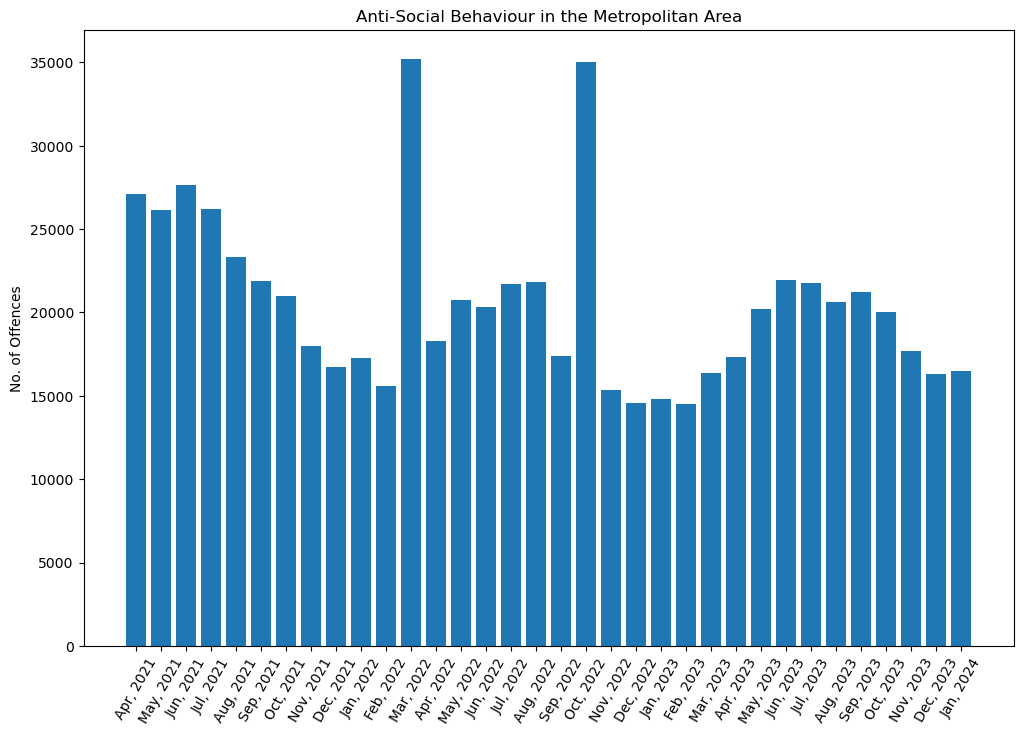

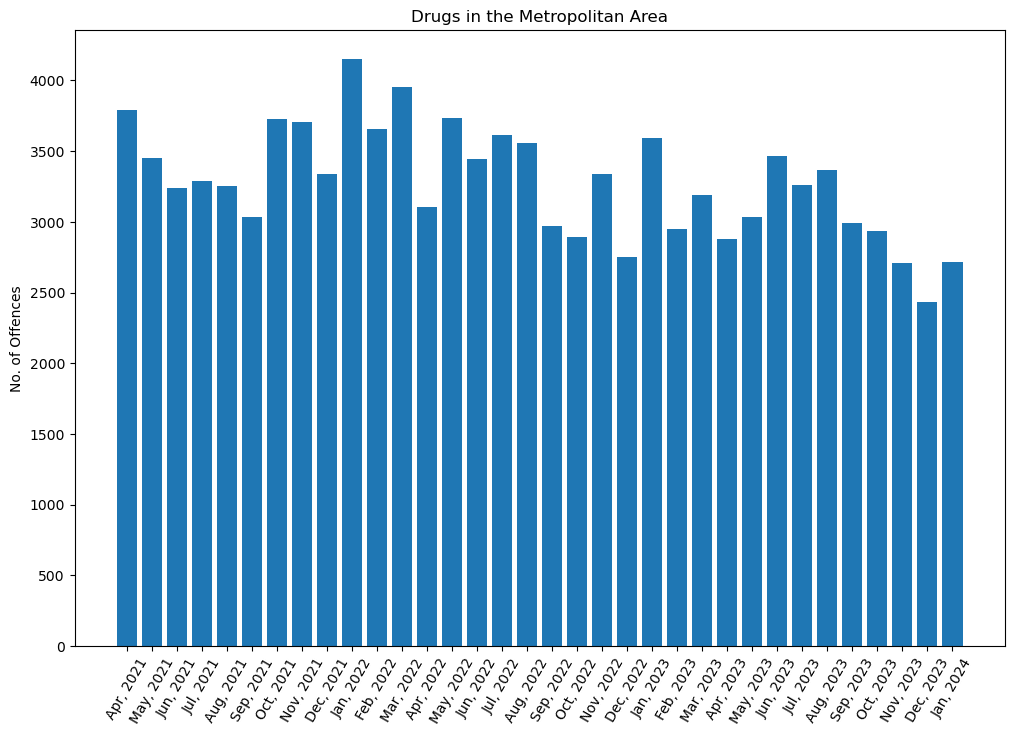

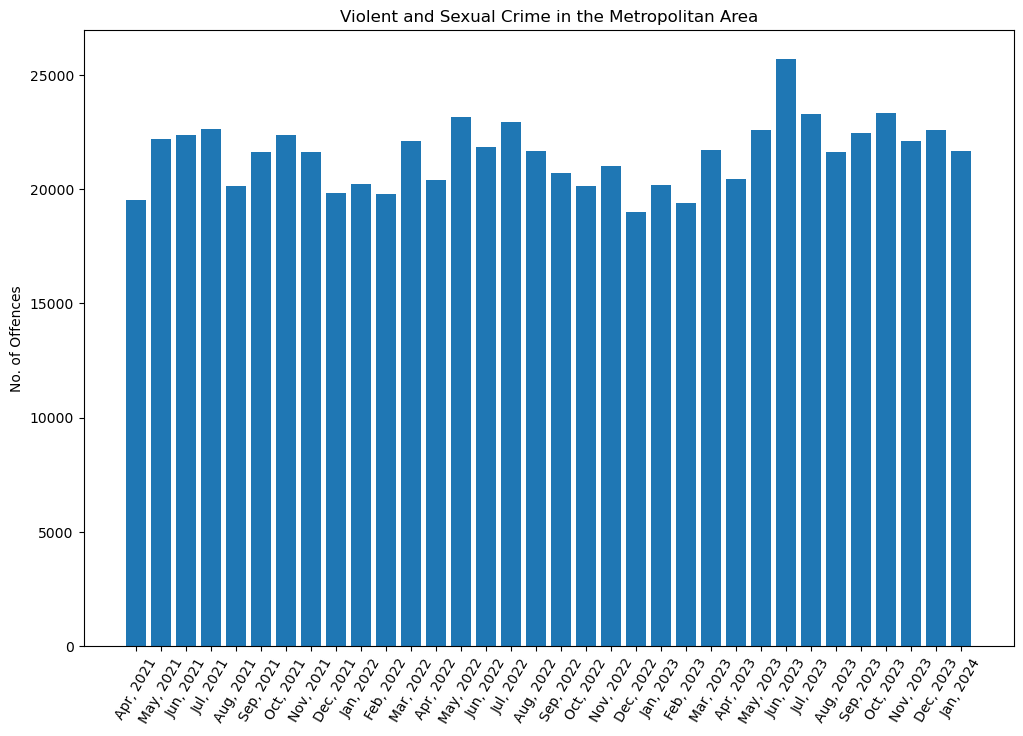

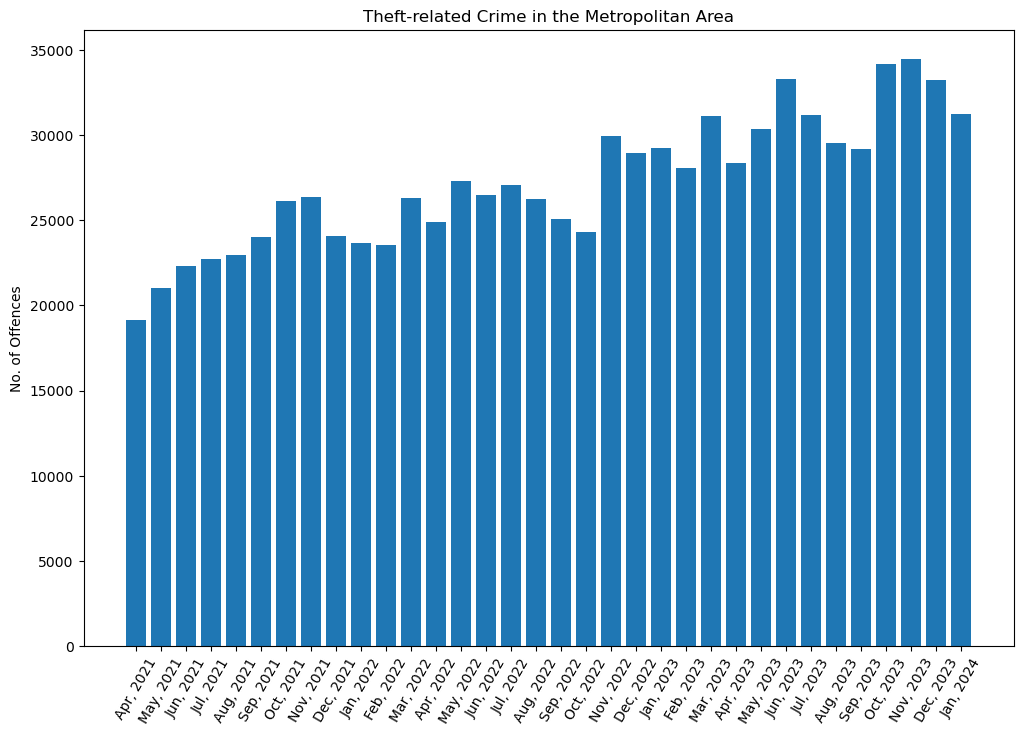

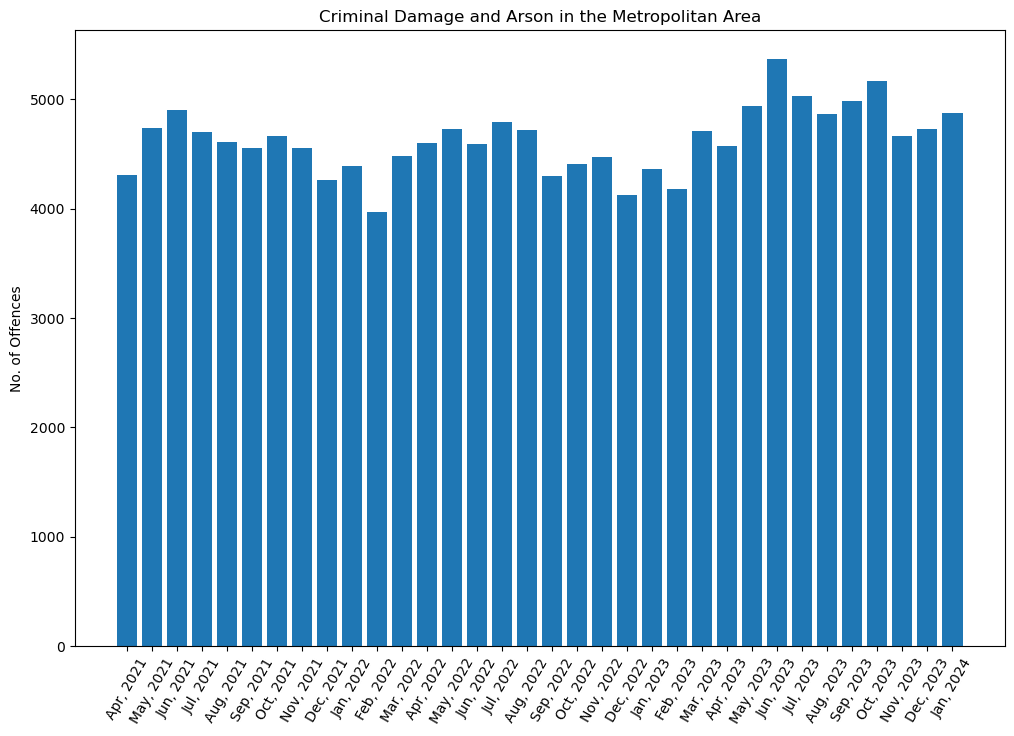

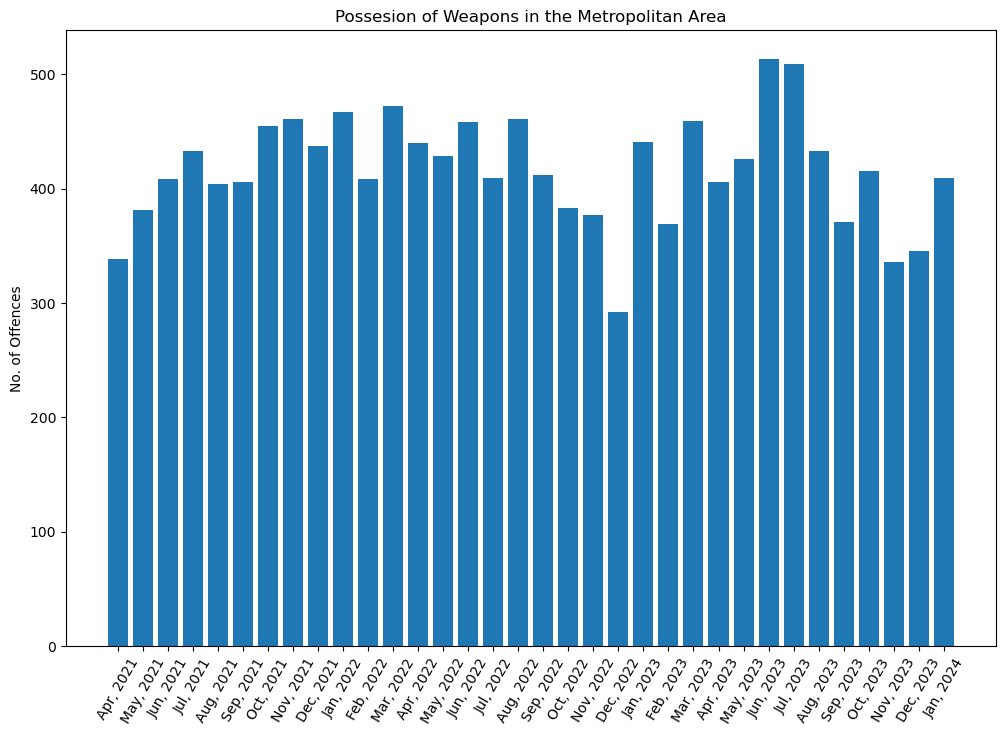

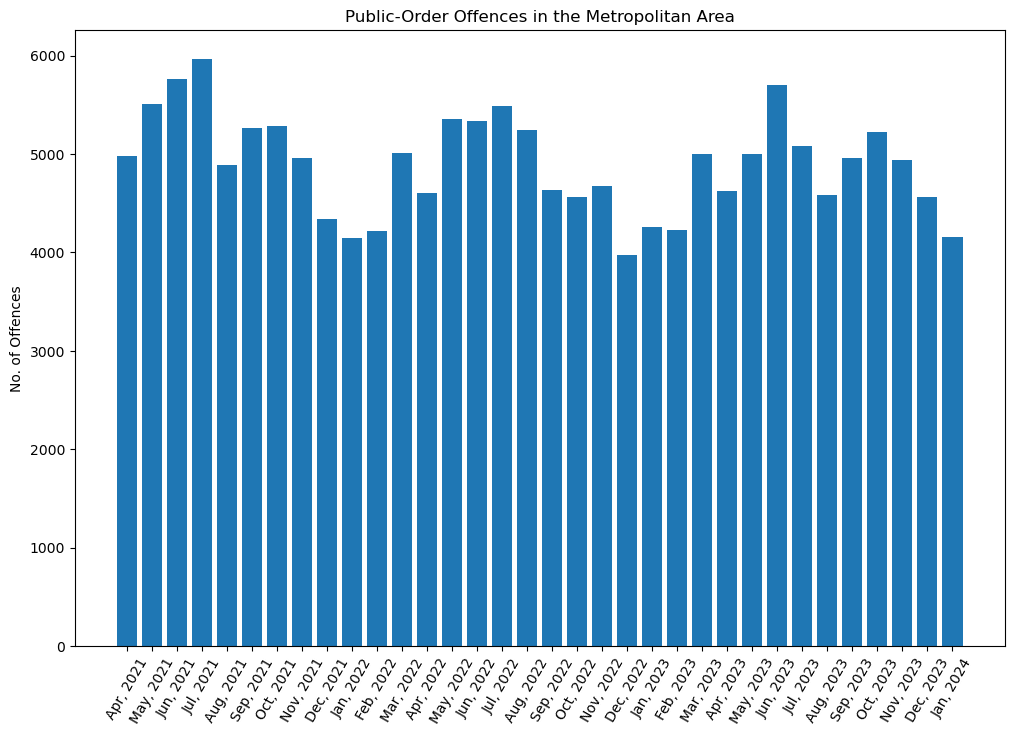

In [70]:
plt.figure(figsize = (12,8))
plt.bar(range(len(met.asb)), list(met.asb.values()), tick_label = list(met.asb.keys()))
plt.title("Anti-Social Behaviour in the Metropolitan Area")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
plt.show()

plt.figure(figsize = (12,8))
plt.bar(range(len(met.drug)), list(met.drug.values()), tick_label = list(met.drug.keys()))
plt.title("Drugs in the Metropolitan Area")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
plt.show()

plt.figure(figsize = (12,8))
plt.bar(range(len(met.vs)), list(met.vs.values()), tick_label = list(met.vs.keys()))
plt.title("Violent and Sexual Crime in the Metropolitan Area")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
plt.show()

plt.figure(figsize = (12,8))
plt.bar(range(len(met.theft)), list(met.theft.values()), tick_label = list(met.theft.keys()))
plt.title("Theft-related Crime in the Metropolitan Area")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
plt.show()

plt.figure(figsize = (12,8))
plt.bar(range(len(met.cda)), list(met.cda.values()), tick_label = list(met.cda.keys()))
plt.title("Criminal Damage and Arson in the Metropolitan Area")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
plt.show()

plt.figure(figsize = (12,8))
plt.bar(range(len(met.pow)), list(met.pow.values()), tick_label = list(met.pow.keys()))
plt.title("Possesion of Weapons in the Metropolitan Area")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
plt.show()

plt.figure(figsize = (12,8))
plt.bar(range(len(met.pubord)), list(met.pubord.values()), tick_label = list(met.pubord.keys()))
plt.title("Public-Order Offences in the Metropolitan Area")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
plt.show()

C:\Users\jmcel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jmcel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


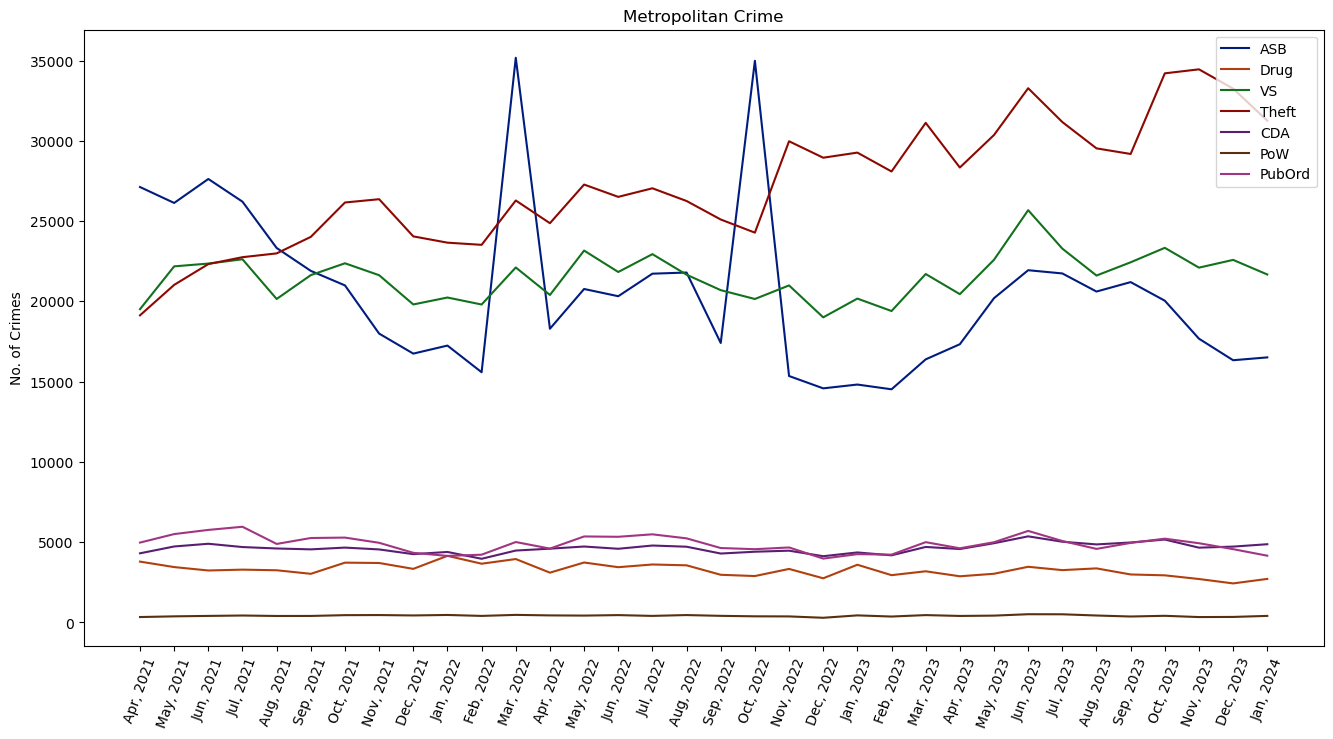

In [92]:
sns.set_palette(palette = 'dark')
met_plot = sns.lineplot(data = met_count, legend = 'auto', dashes = False)
met_plot.figure.set_size_inches(16,8)
sns.move_legend(met_plot, 'upper right')
plt.xticks(rotation = 70)
plt.title('Metropolitan Crime')
plt.ylabel('No. of Crimes')
plt.show()

## West Midlands Area Graphs

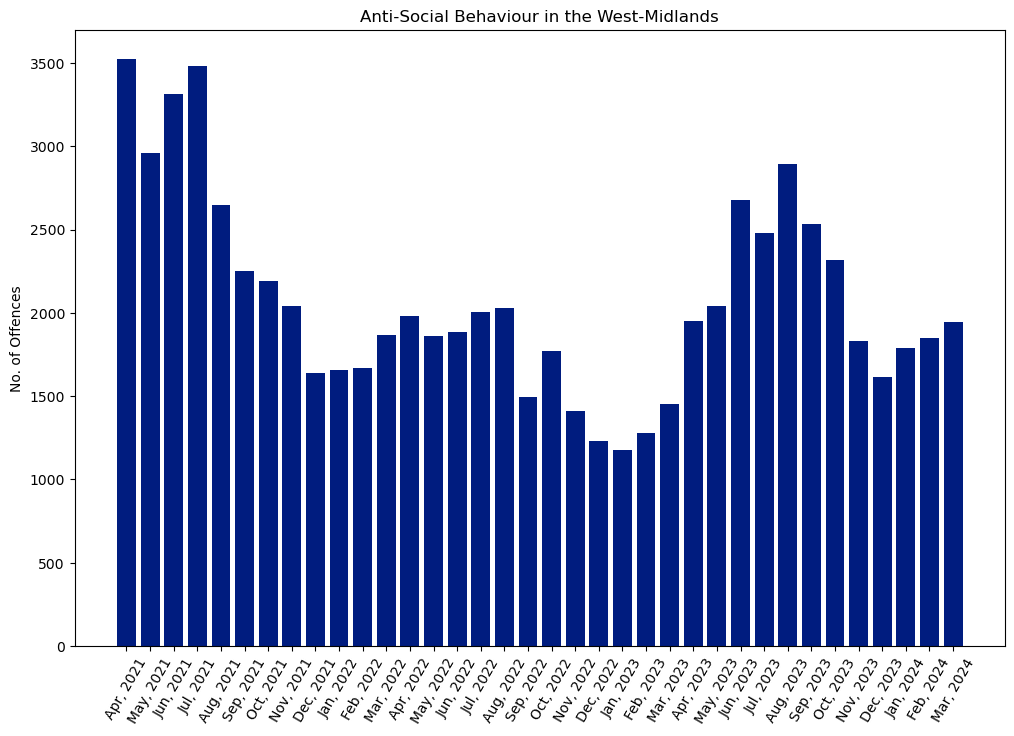

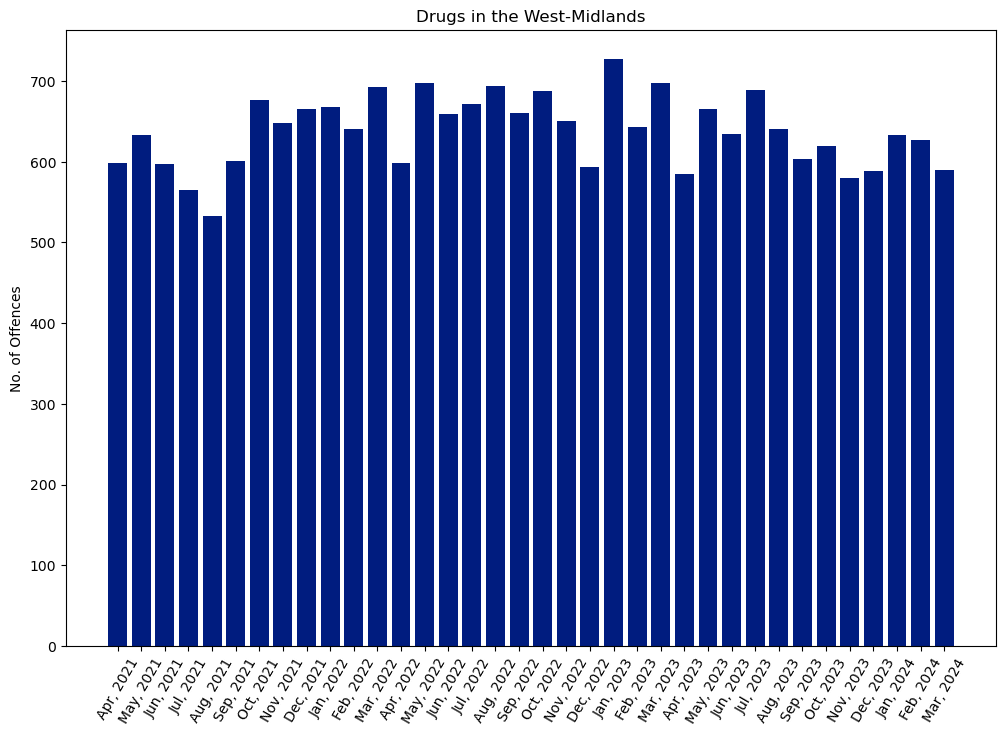

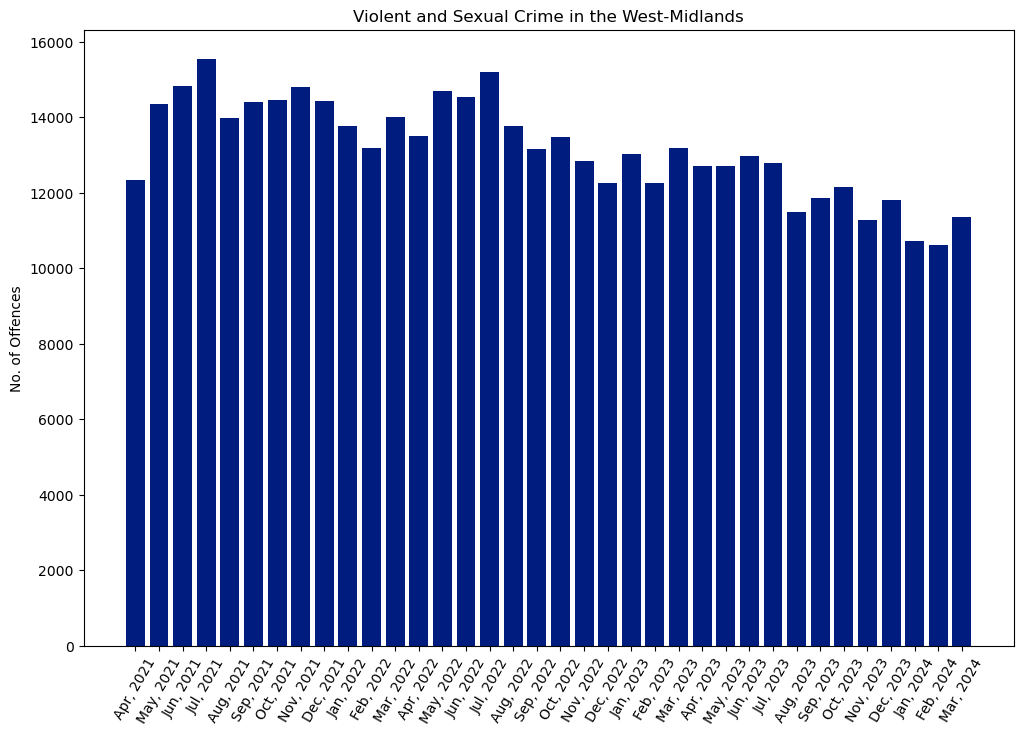

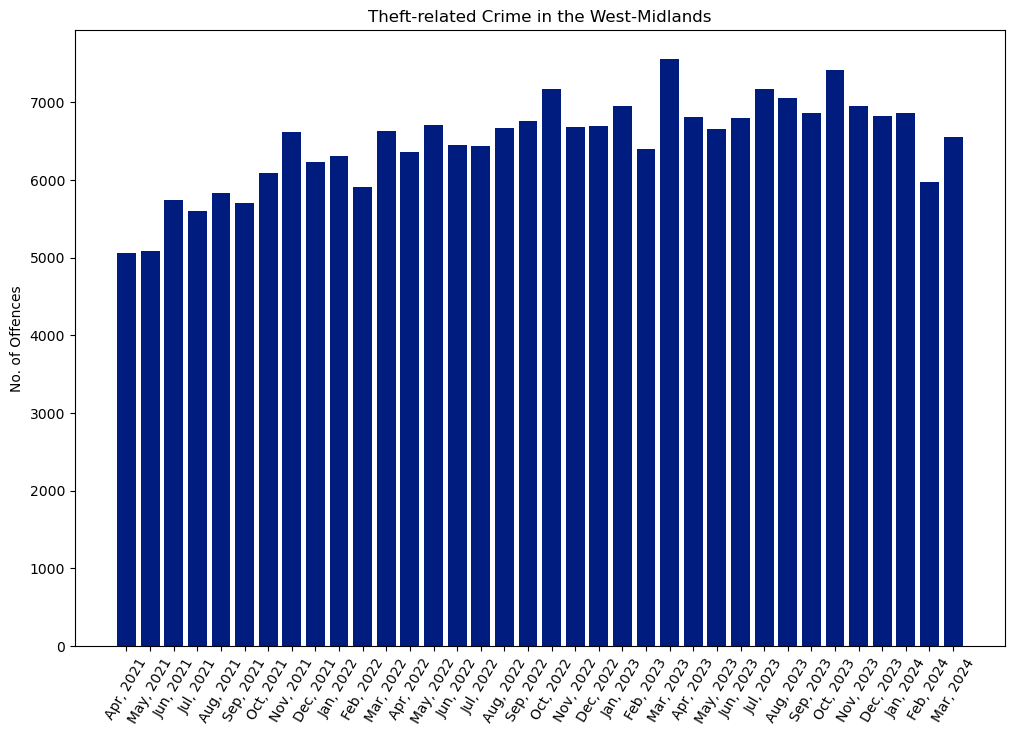

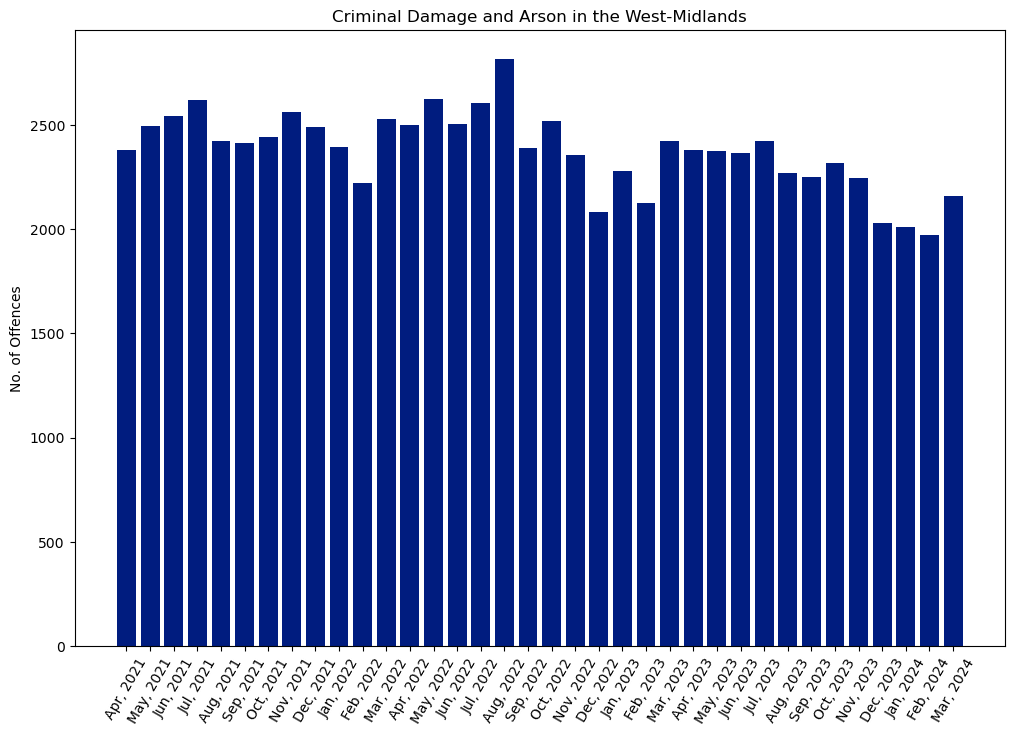

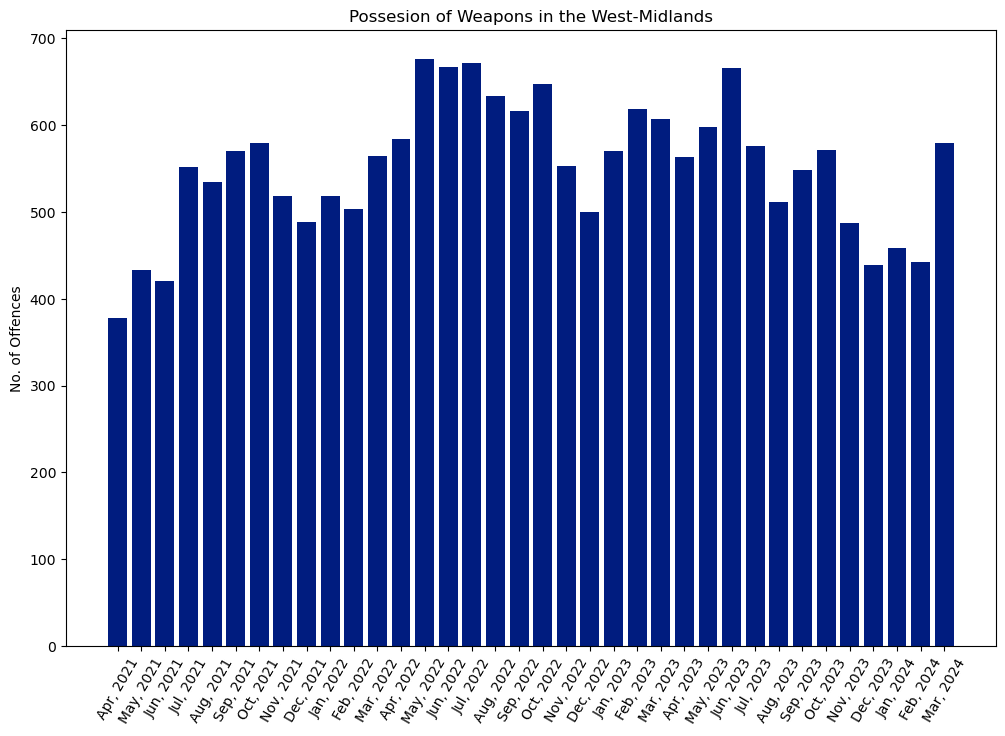

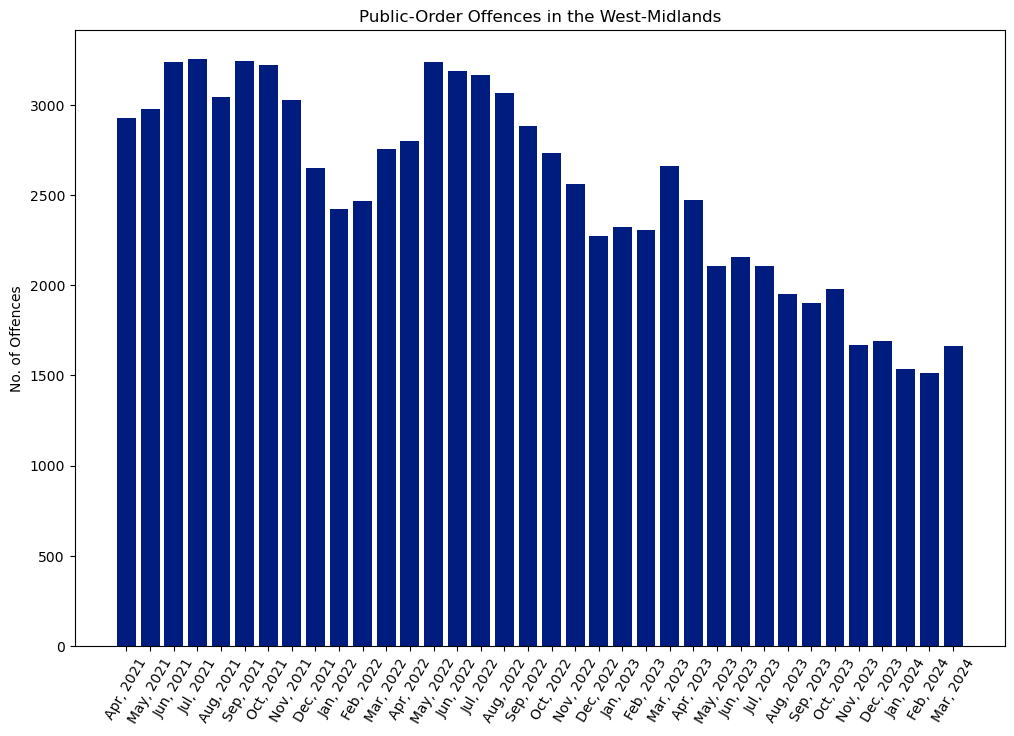

In [72]:
plt.figure(figsize = (12,8))
plt.bar(range(len(wm.asb)), list(wm.asb.values()), tick_label = list(wm.asb.keys()))
plt.title("Anti-Social Behaviour in the West-Midlands")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
plt.show()

plt.figure(figsize = (12,8))
plt.bar(range(len(wm.drug)), list(wm.drug.values()), tick_label = list(wm.drug.keys()))
plt.title("Drugs in the West-Midlands")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
plt.show()

plt.figure(figsize = (12,8))
plt.bar(range(len(wm.vs)), list(wm.vs.values()), tick_label = list(wm.vs.keys()))
plt.title("Violent and Sexual Crime in the West-Midlands")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
plt.show()

plt.figure(figsize = (12,8))
plt.bar(range(len(wm.theft)), list(wm.theft.values()), tick_label = list(wm.theft.keys()))
plt.title("Theft-related Crime in the West-Midlands")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
plt.show()

plt.figure(figsize = (12,8))
plt.bar(range(len(wm.cda)), list(wm.cda.values()), tick_label = list(wm.cda.keys()))
plt.title("Criminal Damage and Arson in the West-Midlands")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
plt.show()

plt.figure(figsize = (12,8))
plt.bar(range(len(wm.pow)), list(wm.pow.values()), tick_label = list(wm.pow.keys()))
plt.title("Possesion of Weapons in the West-Midlands")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
plt.show()

plt.figure(figsize = (12,8))
plt.bar(range(len(wm.pubord)), list(wm.pubord.values()), tick_label = list(wm.pubord.keys()))
plt.title("Public-Order Offences in the West-Midlands")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
plt.show()

C:\Users\jmcel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jmcel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


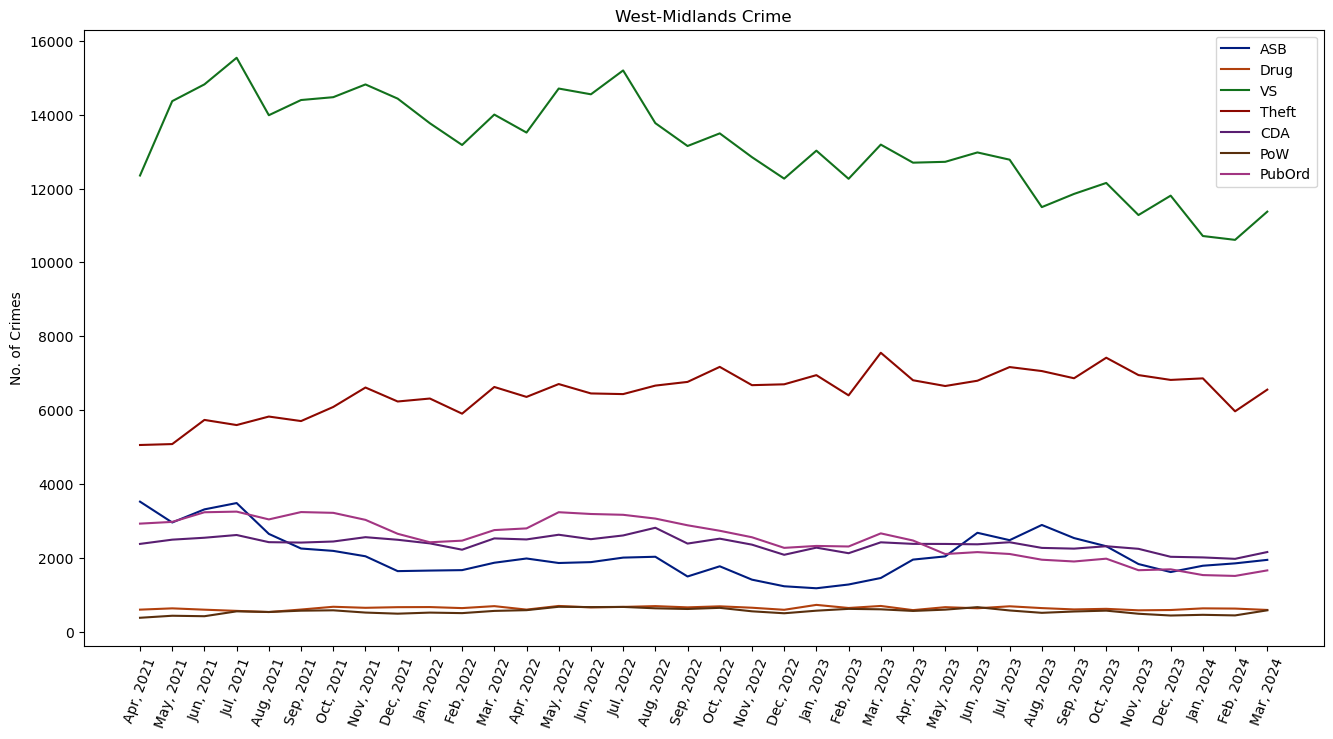

In [73]:
sns.set_palette(palette = 'dark')
met_plot = sns.lineplot(data = wm_count, legend = 'auto', dashes = False)
met_plot.figure.set_size_inches(16,8)
plt.xticks(rotation = 70)
plt.title('West-Midlands Crime')
plt.ylabel('No. of Crimes')
plt.show()

## North Yorkshire Area Graphs

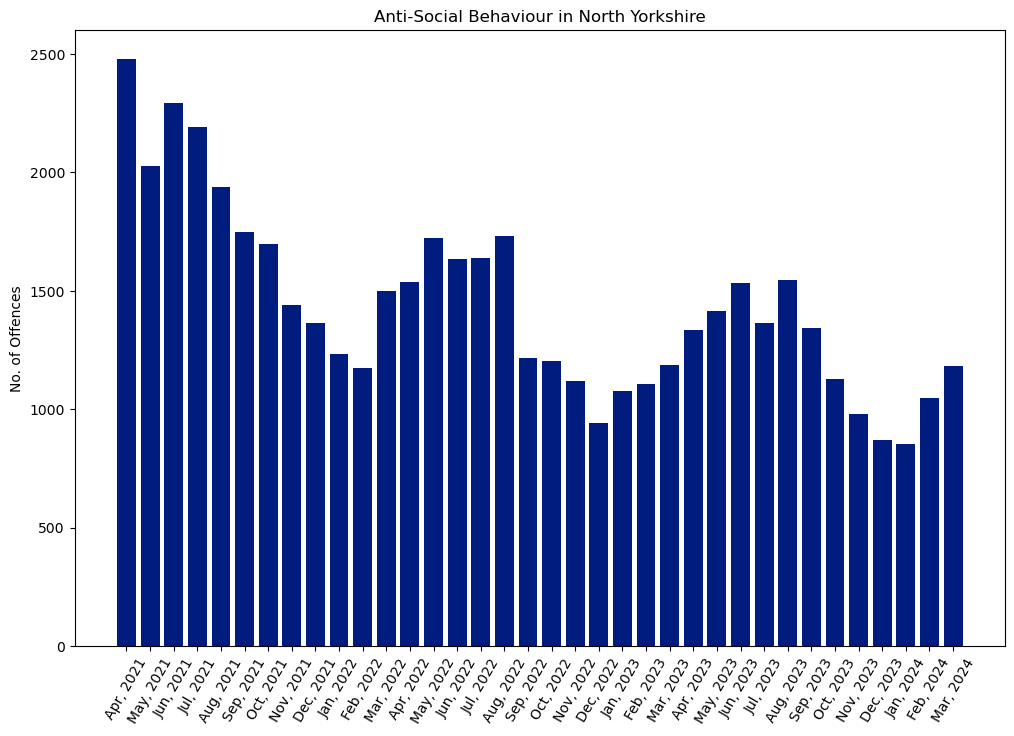

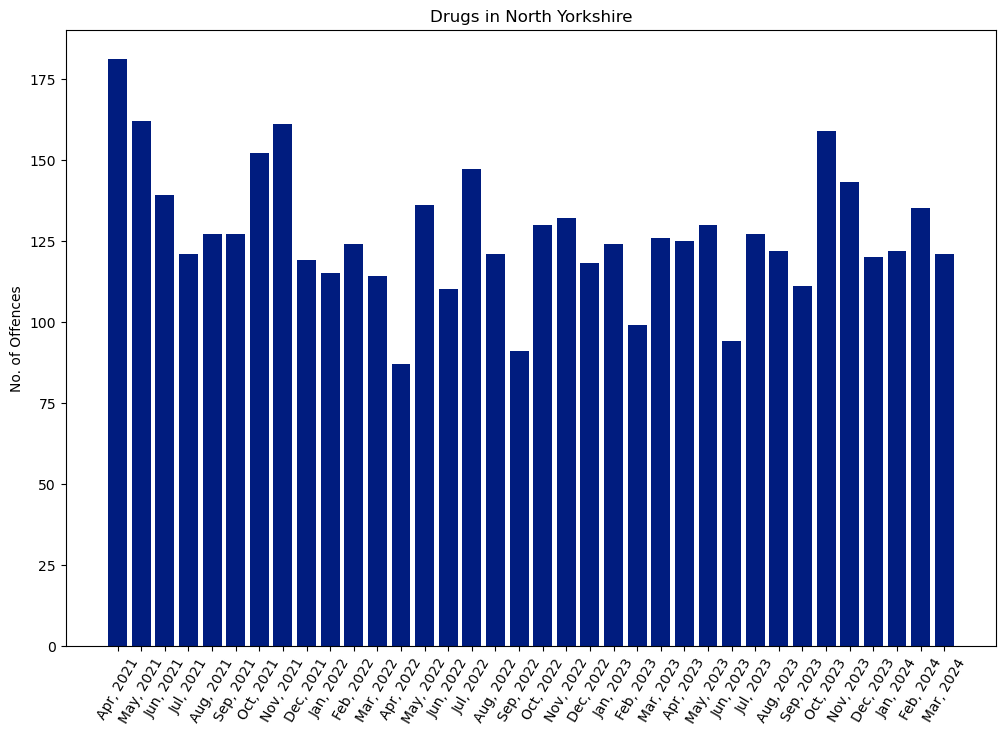

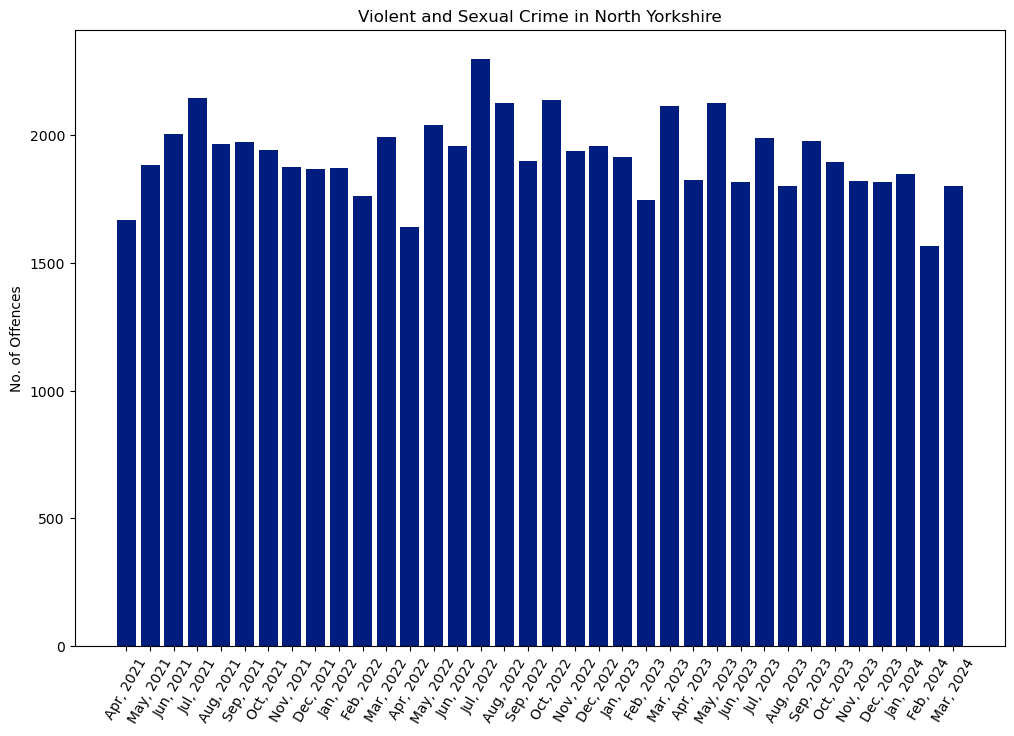

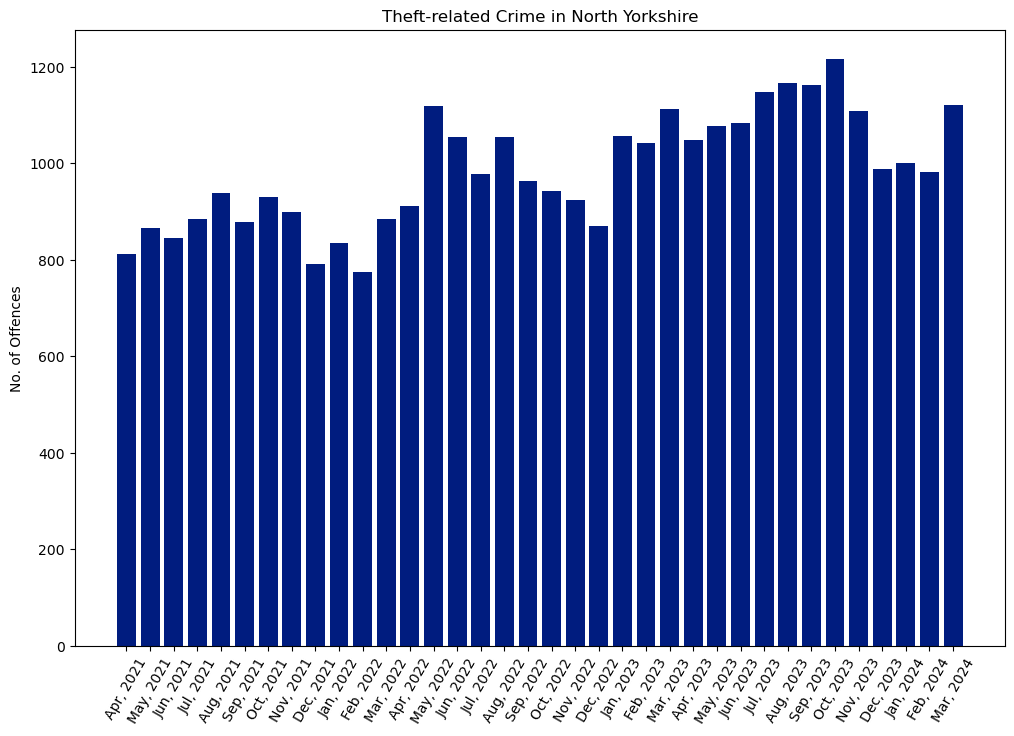

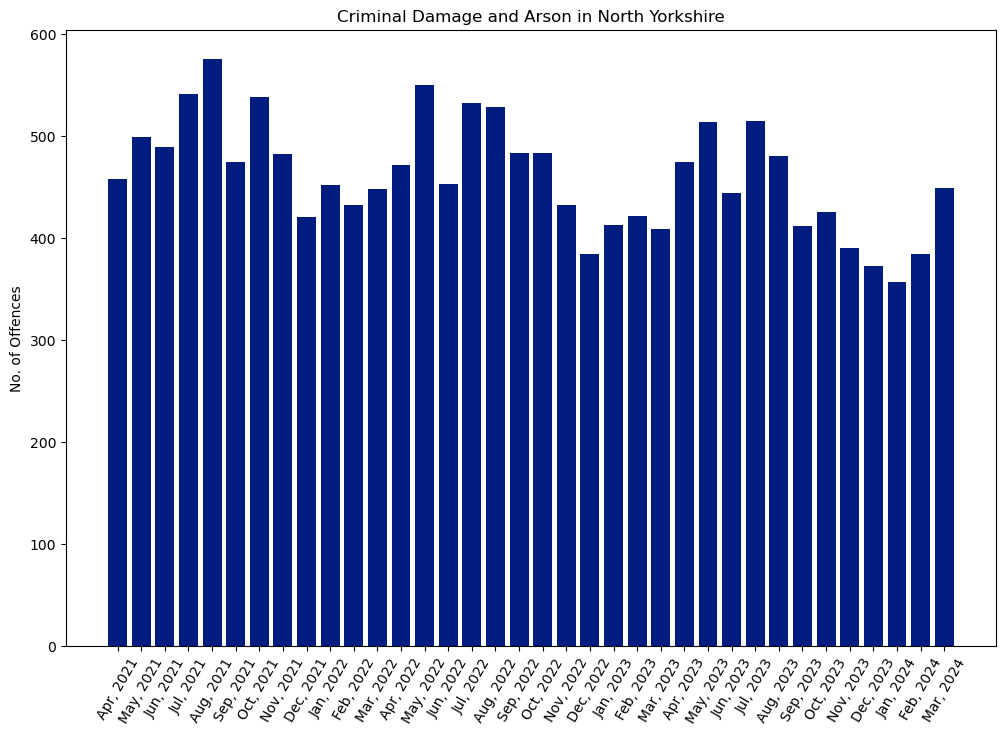

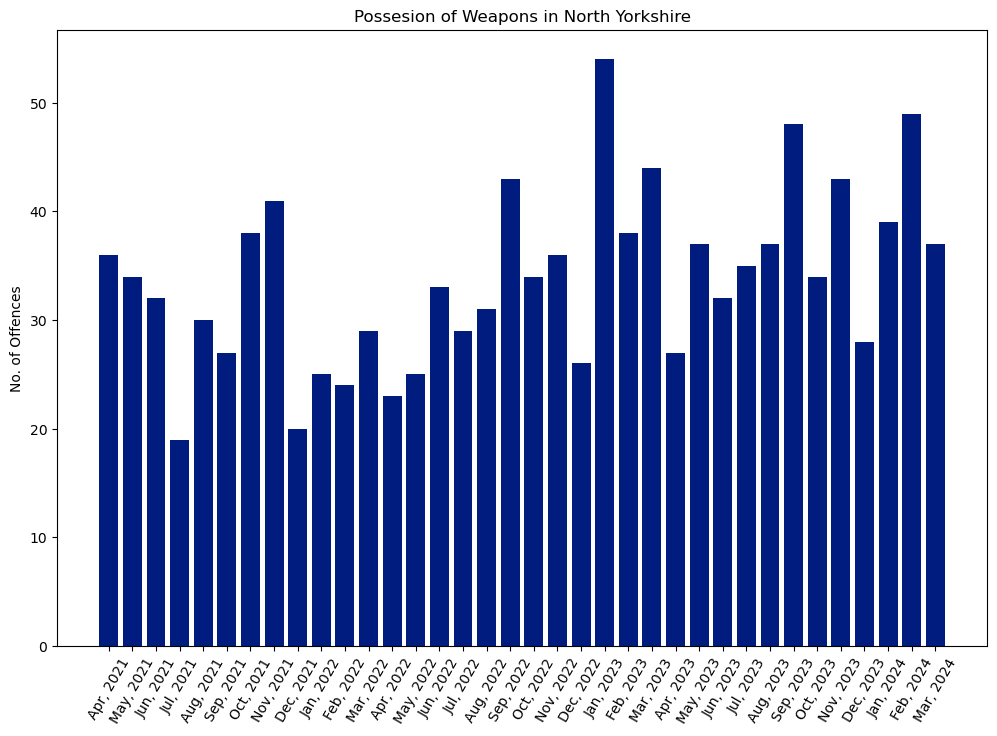

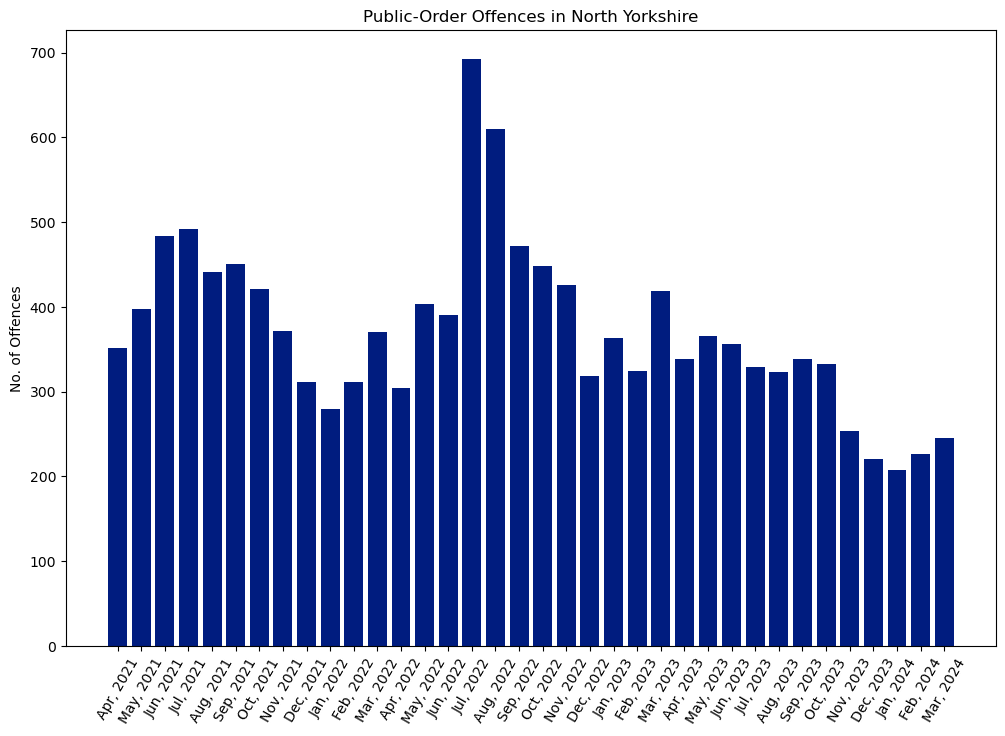

In [109]:
plt.figure(figsize = (12,8))
plt.bar(range(len(ny.asb)), list(ny.asb.values()), tick_label = list(ny.asb.keys()))
plt.title("Anti-Social Behaviour in North Yorkshire")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
ny_asb_bar = plt.gca()
plt.show()

plt.figure(figsize = (12,8))
plt.bar(range(len(ny.drug)), list(ny.drug.values()), tick_label = list(ny.drug.keys()))
plt.title("Drugs in North Yorkshire")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
ny_drug_bar = plt.gca()
plt.show()

plt.figure(figsize = (12,8))
plt.bar(range(len(ny.vs)), list(ny.vs.values()), tick_label = list(ny.vs.keys()))
plt.title("Violent and Sexual Crime in North Yorkshire")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
plt.show()

plt.figure(figsize = (12,8))
plt.bar(range(len(ny.theft)), list(ny.theft.values()), tick_label = list(ny.theft.keys()))
plt.title("Theft-related Crime in North Yorkshire")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
plt.show()

plt.figure(figsize = (12,8))
plt.bar(range(len(ny.cda)), list(ny.cda.values()), tick_label = list(ny.cda.keys()))
plt.title("Criminal Damage and Arson in North Yorkshire")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
plt.show()

plt.figure(figsize = (12,8))
plt.bar(range(len(ny.pow)), list(ny.pow.values()), tick_label = list(ny.pow.keys()))
plt.title("Possesion of Weapons in North Yorkshire")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
plt.show()

plt.figure(figsize = (12,8))
plt.bar(range(len(ny.pubord)), list(ny.pubord.values()), tick_label = list(ny.pubord.keys()))
plt.title("Public-Order Offences in North Yorkshire")
plt.xticks(rotation = 60)
plt.ylabel('No. of Offences')
plt.show()

C:\Users\jmcel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jmcel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


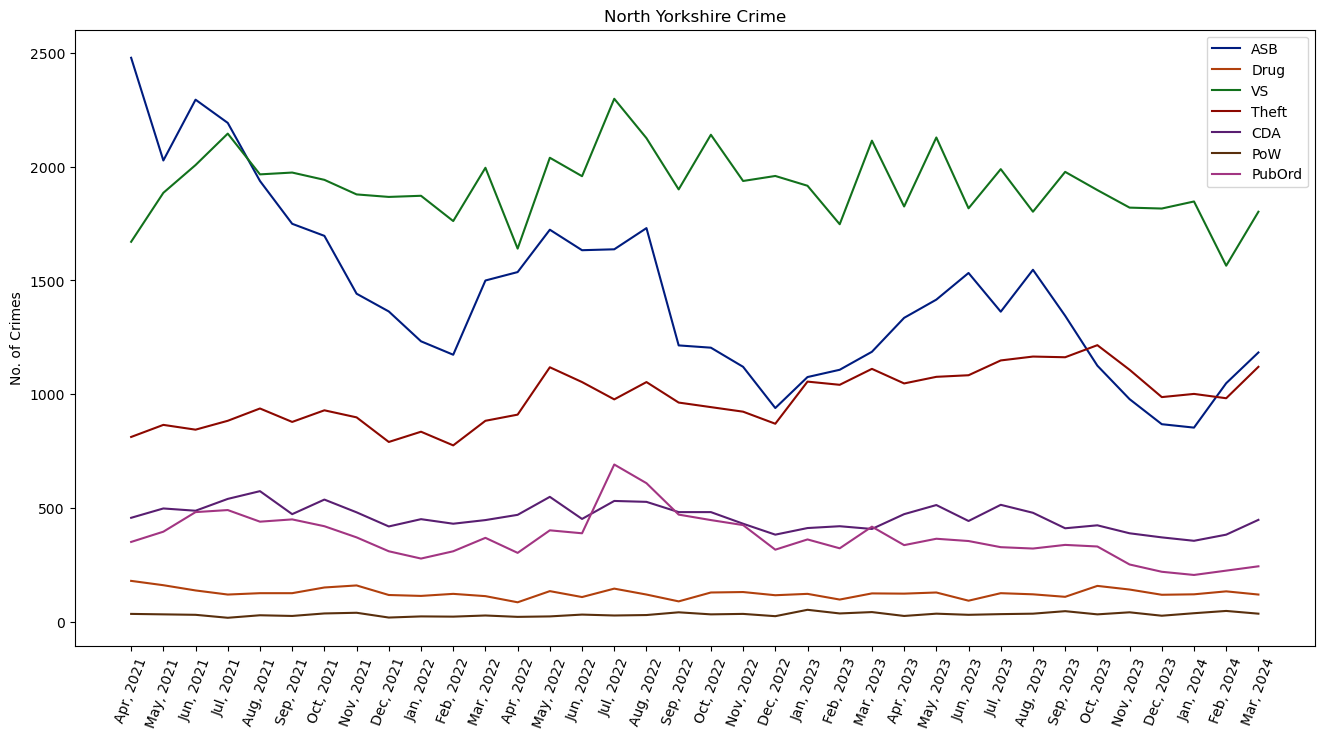

In [75]:
sns.set_palette(palette = 'dark')
met_plot = sns.lineplot(data = ny_count, legend = 'auto', dashes = False)
met_plot.figure.set_size_inches(16,8)
plt.xticks(rotation = 70)
plt.title('North Yorkshire Crime')
plt.ylabel('No. of Crimes')
plt.show()

## Stacked Graphs By Crime Type